# **Práctica Deep Learning**



Procesado del dataframe de AirBnb empleado en el módulo de Machine Learning



#### **Cargar las librerías y funciones necesarias**

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import tensorflow as tf
print(tf.__version__)

1.15.2


In [3]:
# Cargamos librerías necesarias
import numpy  as np  
import pandas as pd

import matplotlib.pyplot as plt # para dibujar
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Tratamiento de imágenes
import imageio as io
import cv2

# Sets the value of the specified option
# Para visualizar la información de todas las filas pj dtypes o head().T aplico set_option en max_rows 
pd.set_option('display.max_rows', None)
# Para visualizar la información de la matriz de correlación
pd.set_option('display.max_columns', None)

In [4]:
# Función que realiza comprobaciones sobre una columna de un dataframe
def check_column(df, col_name):
    values_unique = len(df[col_name].unique())
    values_nan = df[col_name].isnull().sum()
    portmissing = round((df[col_name].isnull().sum()/len(df))*100, 4)
    
    print (f'{col_name} consta de: {values_unique} valores distintos de un total de {len(df)}')
    print (f'{col_name} consta de: {values_nan} valores ausentes, {portmissing}%')
    
    df[col_name].value_counts().head()

In [5]:
# Función que calcula el porcentaje de registros a filtrar
def check_filter(df, df_filtered):
    portfilter = round(((len(df) - len(df_filtered))/len(df)) *100, 4)
    print(f'Original: {df.shape}\nModificado: {df_filtered.shape}')
    print(f'{portfilter}% alojamientos filtrados')

In [6]:
# Función que cambiar el orden de una columna
def change_column_order(df, col_name, index):
    cols = df.columns.tolist()
    cols.remove(col_name)
    cols.insert(index, col_name)
    return df[cols]

In [7]:
# Función que separa el dataset en atributos y variable objetivo
from sklearn import preprocessing

def get_attributesdf(df):
  
  # Cambiamos la posición de la columna Price en la posición primera
  df = change_column_order(df, 'Price', 0)

  # convertimos el DataFrame al formato necesario para scikit-learn
  data = df.values

  y_data = data[:,0:1]     # nos quedamos con la 1ª columna, Price
  X_data = data[:,2:]      # nos quedamos con el resto salvo la columna  Thumbnail Url 

  feature_names = df.columns[2:]

  return X_data, y_data

#### **Cargar Dataset airbnb**

Esta fase es una de las fases más costosas pero desde Keepcoding nos facilitan esta tarea.

Desde la URL de OpenDataSoft descargamose el fichero con los datos con nombre "airbnb_extract.csv" y lo guardamos en GDrive

In [ ]:
# Cargar el dataset externo desde OpenDataSoft con la URL
# https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&q=Madrid&timezone=Europe/Berlin&lang=en&use_labels_for_header=true&csv_separator=%3B

!wget -O airbnb_listings.csv "https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&q=Madrid&timezone=Europe/Berlin&lang=en&use_labels_for_header=true&csv_separator=%3B"


--2020-06-18 16:52:03--  https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&q=Madrid&timezone=Europe/Berlin&lang=en&use_labels_for_header=true&csv_separator=%3B
Resolving public.opendatasoft.com (public.opendatasoft.com)... 34.249.199.226, 34.248.20.69
Connecting to public.opendatasoft.com (public.opendatasoft.com)|34.249.199.226|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/csv]
Saving to: ‘airbnb_listings.csv’

airbnb_listings.csv     [               <=>  ]  57.57M   457KB/s    in 2m 15s  

2020-06-18 16:54:24 (437 KB/s) - ‘airbnb_listings.csv’ saved [60364800]



In [ ]:
# Comprobar que tenemos el dataset descargado
!ls -lah /content/drive/My\ Drive/airbnb_listings.csv

-rw------- 1 root root 58M Jun 18 16:56 '/content/drive/My Drive/airbnb_listings.csv'


In [8]:
# montamos GDrive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# almacenamos el dataset airbnb_listings.csv en nuestro drive
!cp airbnb_listings.csv /content/drive/My\ Drive/airbnb_listings.csv

In [9]:
# Comprobar que tenemos el dataset airbnb descargado
!ls -lah /content/drive/My\ Drive/airbnb_listings.csv

-rw------- 1 root root 58M Jun 18 16:56 '/content/drive/My Drive/airbnb_listings.csv'


In [10]:
# Read a dot comma-separated values (csv) file into DataFrame called df_airbnb
# pd invocar la librería de pandas con cabecera
df_airbnb = pd.read_csv('/content/drive/My Drive/airbnb_listings.csv', sep=';', decimal='.')   

print(f'Dimensiones del dataframe df_airbnb son: {df_airbnb.shape[0]} filas y {df_airbnb.shape[1]} columnas')

Dimensiones del dataframe df_airbnb son: 14780 filas y 89 columnas


In [11]:
# The column labels of the DataFrame df_airbnb
df_airbnb.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

In [12]:
# Return the dtypes in the DataFrame df_airbnb
df_airbnb.dtypes

ID                                  int64
Listing Url                        object
Scrape ID                           int64
Last Scraped                       object
Name                               object
Summary                            object
Space                              object
Description                        object
Experiences Offered                object
Neighborhood Overview              object
Notes                              object
Transit                            object
Access                             object
Interaction                        object
House Rules                        object
Thumbnail Url                      object
Medium Url                         object
Picture Url                        object
XL Picture Url                     object
Host ID                             int64
Host URL                           object
Host Name                          object
Host Since                         object
Host Location                     

In [13]:
df_airbnb.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,14780.0,1.028089e+07,5.564829e+06,1.862800e+04,5.554732e+06,1.133492e+07,1.532631e+07,1.910969e+07
Scrape ID,14780.0,2.017037e+13,5.667971e+08,2.016010e+13,2.017041e+13,2.017041e+13,2.017041e+13,2.017062e+13
Host ID,14780.0,3.608080e+07,3.425360e+07,1.745300e+04,6.787360e+06,2.464875e+07,5.432919e+07,1.247534e+08
Host Response Rate,12881.0,9.482346e+01,1.521599e+01,0.000000e+00,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
Host Listings Count,14777.0,1.251364e+01,3.409022e+01,0.000000e+00,1.000000e+00,2.000000e+00,6.000000e+00,5.190000e+02
Host Total Listings Count,14777.0,1.251364e+01,3.409022e+01,0.000000e+00,1.000000e+00,2.000000e+00,6.000000e+00,5.190000e+02
Latitude,14780.0,4.049763e+01,4.641387e+00,-3.785118e+01,4.040973e+01,4.041947e+01,4.043092e+01,5.596691e+01
Longitude,14780.0,-3.858041e+00,1.412315e+01,-1.231313e+02,-3.707604e+00,-3.700785e+00,-3.684057e+00,1.533714e+02
Accommodates,14780.0,3.277808e+00,2.097291e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,1.600000e+01
Bathrooms,14725.0,1.281732e+00,6.585171e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00


In [14]:
# Visualizamos las primeras filas del dataset
df_airbnb.head(3)

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,12768616,https://www.airbnb.com/rooms/12768616,20170407214050,2017-04-08,Ramblas Studio D,"Unique apartment in vibrant neighborhoods, car...",Centrally located in the atmospheric Gothic Qu...,"Unique apartment in vibrant neighborhoods, car...",none,Located on the edge of the Gothic Quarter of B...,NaN,The nearest station is Place de Catalunya a fe...,NaN,NaN,No pets or smoking allowed.,https://a0.muscache.com/im/pictures/cffe393a-0...,https://a0.muscache.com/im/pictures/cffe393a-0...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/cffe393a-0...,54310958,https://www.airbnb.com/users/show/54310958,Javier,2016-01-12,"Madrid, Community of Madrid, Spain",Be Mate offers the exclusive City Mate service...,within an hour,99.0,NaN,https://a0.muscache.com/im/pictures/8f3ec0f2-1...,https://a0.muscache.com/im/pictures/8f3ec0f2-1...,L'Antiga Esquerra de l'Eixample,207.0,207.0,"email,phone,reviews,jumio","El Gòtic, Barcelona, Catalunya 08002, Spain",El Gòtic,el Barri Gòtic,Ciutat Vella,Barcelona,Catalunya,08002,Barcelona,"Barcelona, Spain",ES,Spain,41.383887,2.171802,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,...",NaN,349.0,NaN,NaN,NaN,NaN,1,0,2,1125,a week ago,NaN,2,2,2,2,2017-04-08,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,strict,92.0,NaN,"41.3838872822,2.17180232785","Host Has Profile Pic,Host Identity Verified,Is..."
1,1629146,https://www.airbnb.com/rooms/1629146,20170407214050,2017-04-08,"Design, art & vintage / old city","If you're looking for a cool, spacious, light,...",The apartment is very comfortable and very tas...,"If you're looking for a cool, spacious, light,...",none,• A major advantage of this apartment is its l...,• Possibility of offering Premium Services suc...,• Nearest metro station is 1 min walk (Sant A...,Here's a list of of things we provide to our g...,==============================================...,* NO parties are allowed * NO noise on the st...,https://a0.muscache.com/im/pictures/ea919e56-a...,https://a0.muscache.com/im/pictures/ea919e56-a...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/ea919e56-a...,8658841,https://www.airbnb.com/users/show/8658841,Olga & Co.,2013-09-05,"Barcelona, Catalonia, Spain","World traveller, currently living and working ...",within an hour,100.0,NaN,https://a0.muscache.com/im/pictures/d67fdad1-e...,https://a0.muscache.com/im/pictures/d67fdad1-e...,El Raval,2.0,2.0,"email,phone,reviews,jumio","El Raval, Barcelona, Catalonia 08001, Spain",El Raval,el Raval,Ciutat Vella,Barcelona,Catalonia,08001,Barcelona,"Barcelona, Spain",ES,Spain,41.382663,2.167558,Apartment,Entire home/apt,6,1.0,2.0,3.0,Real Bed,"TV,Internet,

#### **División del dataset en train, validation y test**

Dividimos el dataframe df_airbnb en tres conjuntos: 

*   Training (entrenamiento)
*   Validation (validación)
*   Test (muestra no utilizada hasta la elección del modelo para su evaluación)

utizando:

    train_test_split = Split arrays or matrices into random train and test subsets con los parámetros:
      - shuffle = True   (orden aleatorio)
      - random_state = 0 (repetitibilidad de los datos) Using an int will produce the same results across different calls.
      - stratify = para estratificar la variable objetivo en el problema de clasificación.
      - test_size = Represent the proportion of the dataset df_train 75% to include in the test split.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Dividimos los datos del df en entrenamiento y test (2/3 training, 1/3 test) 
# random_state = repetitibidad de los datos
# shuffle by default is True --> orden aleatorio
airbnb_train, airbnb_test = train_test_split(df_airbnb, test_size=0.33, shuffle=True, random_state = 0)
print(f'Datos entrenamiento: {airbnb_train.shape}')
print(f'Datos test:  {airbnb_test.shape}')

# y despues volvemos a dividir training en validation (80% training, 20% validation)
airbnb_train, airbnb_val = train_test_split(airbnb_train, test_size=0.20, shuffle=True, random_state = 0)
print(f'Datos entrenamiento: {airbnb_train.shape}')
print(f'Datos validación:  {airbnb_val.shape}')

# Guardamos los conjuntos de training, validation y testing teniendo en cuenta los índices en una columna más Unamed 0
#df_train.to_csv('/content/drive/My Drive/airbnb_train_rg.csv', sep=';', decimal='.', index=False)
#df_val.to_csv('/content/drive/My Drive/airbnb_val_rg.csv', sep=';', decimal='.', index=False)
#df_test.to_csv('/content/drive/My Drive/airbnb_test_rg.csv', sep=';', decimal='.', index=False)

# Lectura de dichos dataframes cuando los necesitemos
#df_train = pd.read_csv('/content/drive/My Drive/airbnb_train_rg.csv', sep=';', decimal='.')   
#df_val   = pd.read_csv('/content/drive/My Drive/airbnb_val_rg.csv',  sep=';', decimal='.')   
#df_test  = pd.read_csv('/content/drive/My Drive/airbnb_test_rg.csv', sep=';', decimal='.')   

Dimensiones del dataframe df_airbnb son: 14780 filas y 89 columnas
Datos entrenamiento: (9902, 89)
Datos test:  (4878, 89)
Datos entrenamiento: (7921, 89)
Datos validación:  (1981, 89)


In [15]:
# Read a dot comma-separated values (csv) files
#df_airbnb = pd.read_csv('/content/drive/My Drive/airbnb_listings.csv', sep=';', decimal='.')   
df_train = pd.read_csv('/content/drive/My Drive/airbnb_train_rg.csv', sep=';', decimal='.')   
df_val   = pd.read_csv('/content/drive/My Drive/airbnb_val_rg.csv',  sep=';', decimal='.')   
df_test  = pd.read_csv('/content/drive/My Drive/airbnb_test_rg.csv', sep=';', decimal='.')   

print(f'Dimensiones df_airbnb : {df_airbnb.shape}')
print(f'Datos entrenamiento:    {df_train.shape}')
print(f'Datos validación:       {df_val.shape}')
print(f'Datos test:             {df_test.shape}')

Dimensiones df_airbnb : (14780, 89)
Datos entrenamiento:    (7921, 89)
Datos validación:       (1981, 89)
Datos test:             (4878, 89)


#### **Preprocesado de los datos**

Se ha de tener en cuenta que todas las transformaciones que apliquemos en training se deben aplicar en validation y test

In [16]:
#The column labels of the DataFrame.
df_train.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

In [17]:
df_train.head(3)

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,16802743,https://www.airbnb.com/rooms/16802743,20170407214119,2017-04-08,Habitación Madrid Centro. Room in Madrid Centro,ENG. Location: Next to Prosperidad Metro (Line...,NaN,ENG. Location: Next to Prosperidad Metro (Line...,none,NaN,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/2ef95799-b...,https://a0.muscache.com/im/pictures/2ef95799-b...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/2ef95799-b...,89648946,https://www.airbnb.com/users/show/89648946,Mile,2016-08-13,"Madrid, Community of Madrid, Spain",Professional. Responsable,within an hour,80.0,NaN,https://a0.muscache.com/im/pictures/9ad2327c-e...,https://a0.muscache.com/im/pictures/9ad2327c-e...,NaN,2.0,2.0,"email,phone,reviews","Madrid, Comunidad de Madrid, Spain",NaN,Ciudad Jardín,Chamartín,Madrid,Comunidad de Madrid,NaN,Madrid,"Madrid, Spain",ES,Spain,40.444465,-3.677218,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"TV,Wireless Internet,Kitchen,Elevator in build...",NaN,15.0,NaN,NaN,NaN,NaN,1,0,1,1125,7 weeks ago,NaN,0,0,0,97,2017-04-08,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flexible,2.0,NaN,"40.444464578,-3.6772181357","Host Has Profile Pic,Requires License,Instant ..."
1,6478626,https://www.airbnb.com/rooms/6478626,20170407214119,2017-04-08,Habitación con baño .,"Habitación con cama de 150 , para una o dos p...",Tranquilidad y respeto del espacio room with b...,"Habitación con cama de 150 , para una o dos p...",none,"Barrio muy bien comunicado , metro , autobús ,...",NaN,Metro conde de Casal abajo de casa . Líneas de...,"Pueden usar la nevera , microondas , wifi .",Cualquier cosa Q necesiten estaremos para ayud...,Si son fumadores podéis fumar en un patio Q h...,https://a0.muscache.com/im/pictures/86864154/1...,https://a0.muscache.com/im/pictures/86864154/1...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/86864154/1...,25709853,https://www.airbnb.com/users/show/25709853,Vílma,2015-01-06,"Madrid, Community of Madrid, Spain",NaN,within an hour,84.0,NaN,https://a0.muscache.com/im/users/25709853/prof...,https://a0.muscache.com/im/users/25709853/prof...,NaN,3.0,3.0,"email,phone,reviews","Madrid, Comunidad de Madrid 28007, Spain",NaN,Niño Jesús,Retiro,Madrid,Comunidad de Madrid,28007,Madrid,"Madrid, Spain",ES,Spain,40.406953,-3.670894,Apartment,Private room,2,2.0,1.0,1.0,Real Bed,"TV,Wireless Internet,Kitchen,Heating,Essential...",NaN,28.0,NaN,NaN,NaN,NaN,1,5,1,1125,2 weeks ago,NaN,0,3,12,240,2017-04-07,171,2015-06-14,2017-03-22,87.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN,NaN,flexible,3.0,7.71,"40.4069528479,-3.6708944906","Host Has Profile Pic,Requires License,Instant ..."
2,15667589,https://www.airbnb.com/rooms/15667589,20170407214119,2017-04-08

In [18]:
# Return the dtypes in the DataFrame.
df_train.dtypes

ID                                  int64
Listing Url                        object
Scrape ID                           int64
Last Scraped                       object
Name                               object
Summary                            object
Space                              object
Description                        object
Experiences Offered                object
Neighborhood Overview              object
Notes                              object
Transit                            object
Access                             object
Interaction                        object
House Rules                        object
Thumbnail Url                      object
Medium Url                         object
Picture Url                        object
XL Picture Url                     object
Host ID                             int64
Host URL                           object
Host Name                          object
Host Since                         object
Host Location                     

*   Localizar variables que no aportan información para así descartarlas del dataframe

In [19]:
# Weekly Price y Monthly Price son linealmente dependientes de la variable objetivo Price y 
# actuarían como predictores y el modelo no sería válido, por tanto como además tienen muchos
# valores ausentes, la opción es eliminarlos
check_column(df_train, 'Weekly Price')
check_column(df_train, 'Monthly Price')

Weekly Price consta de: 305 valores distintos de un total de 7921
Weekly Price consta de: 6008 valores ausentes, 75.849%
Monthly Price consta de: 403 valores distintos de un total de 7921
Monthly Price consta de: 6047 valores ausentes, 76.3414%


In [20]:
# Análisis de otras variables
check_column(df_train, 'Reviews per Month')

Reviews per Month consta de: 739 valores distintos de un total de 7921
Reviews per Month consta de: 1747 valores ausentes, 22.0553%


Las variables URL no aportan información de cara a la predicción del precio del airbnb, mantenemos la variable Thumbnail Url que corresponde a la imagen descargada en cada alojamiento:

```
Listing Url: URL del alojamiento
Medium Url: URL tamaño medio
Picture Url: Url descarga foto
XL Picture Url: URL tamaño grande
Host URL: URL del anfitrión o host
Host Thumbnail Url: URL foto del host tamaño miniatura
Host Picture  Url: URL foto del host tamaño medio
```

Otras variables que tampoco aportan información:

```
ID: ID alojamiento
Scrape ID: ID scrape
Last Scraped: fecha del último scraped 
Calendar last Scraped:
Weekly Price: campo que podría actuar como predictor con un 75.70% de valores ausentes.
Monthly Price: campo que podría actuar como predictor con un 75.74% de valores ausentes.
Reviews per Month
Geolocation: consta del par Latitude, Longitude y estos campos ya se encuentran definidos en el dataframe
```

Otras variables que tampoco aportan información puesto que está asociada al host o anfitrión, son las siguientes:

```
Host ID: ID host  
Host Name: nombre del anfitrión
Host Location: localización del host
Host About: acerca del anfitrión
Host Neighbourhood: vecindario del anfitrión
Host Listings Count
Host Total Listings Count
Calculated host listings count
```



In [21]:
# Columnas a eliminar porque no aportan información 

columns_1drop = ['Listing Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 
                'Host URL', 'Host Thumbnail Url', 'Host Picture Url', 
                'ID', 'Scrape ID', 'Last Scraped', 'Calendar last Scraped', 'Weekly Price', 'Monthly Price',
                'Reviews per Month', 'Geolocation', 
                'Host ID', 'Host Name', 'Host Location', 'Host About', 'Host Neighbourhood',
                'Host Listings Count', 'Host Total Listings Count', 'Calculated host listings count']

# Drop specified labels from rows or columns
# axis: {0 or 'index', 1 or 'columns'}, default 0
# inplace: bool,  default False. If True, do operation inplace and return None 
# inplace especifica que el DataFrame se modifica en el lugar si inplace = True, 
# de lo contrario, devuelve el nuevo DataFrame con el DataFrame original sin modificar.
df_train.drop(columns_1drop, axis=1, inplace=True)  

print(f'Dimensiones datos entrenamiento son: {df_train.shape}')


Dimensiones datos entrenamiento son: (7921, 66)




*   Resumir toda la información posible de los datos para tener una idea de cómo son las ditribuciones de cada una de las variables. Y por otro lado, nos permitirá verificar si existen datos anómalos, también conocidos como outliers.

    - Analizar los valores ausentes o missing de cada una de las variables/columnas
    - Analizar los distintos valores de cada una de las variables/columna



In [22]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Response Rate,6859.0,94.824610,15.441901,0.000000,100.000000,100.000000,100.000000,100.000000
Latitude,7921.0,40.521401,4.348730,-37.842522,40.409760,40.419449,40.431081,55.966912
Longitude,7921.0,-3.845009,13.275424,-123.124429,-3.707408,-3.700730,-3.684010,153.371427
Accommodates,7921.0,3.261709,2.064016,1.000000,2.000000,3.000000,4.000000,16.000000
Bathrooms,7893.0,1.273027,0.645624,0.000000,1.000000,1.000000,1.000000,8.000000
Bedrooms,7909.0,1.342900,0.890577,0.000000,1.000000,1.000000,2.000000,10.000000
Beds,7895.0,2.036225,1.572649,1.000000,1.000000,2.000000,2.000000,16.000000
Square Feet,299.0,399.909699,633.667228,0.000000,0.000000,80.000000,613.500000,5167.000000
Price,7913.0,74.033110,72.795768,9.000000,35.000000,55.000000,86.000000,950.000000
Security Deposit,3415.0,187.858565,115.288071,0.000000,100.000000,150.000000,200.000000,990.000000


Con la columna count (proporciona el número de observaciones que no son NA) del comando describe, observamos que algunas de estas variables numéricas tienen bastantes valores ausentes, entre las que destacan Host Acceptance Rate, Square Feet, Has Availability, License y Jurisdiction Names.

    Un primer paso será evaluar los valores ausentes de cada una de las columnas del dataframe
    Un segundo paso será evaluar los diferentes valores de cada una de las columnas del dataframe
    Un tercer paso es analizar algunas variables con values_counts() =Return a Series containing counts of unique values.

In [23]:
# Detect missing values en Pandas (isnull or isna )
# Count the Null Columns
null_columns = df_train.columns[df_train.isnull().any()]
df_train[null_columns].isnull().sum() # es equivalente airbnb_train.isna().sum()

Name                               1
Summary                          309
Space                           2080
Description                        4
Neighborhood Overview           3018
Notes                           4918
Transit                         3068
Access                          3468
Interaction                     3539
House Rules                     2772
Thumbnail Url                   1499
Host Since                         1
Host Response Time              1062
Host Response Rate              1062
Host Acceptance Rate            7902
Host Verifications                 5
Neighbourhood                   2778
Neighbourhood Group Cleansed     523
City                               5
State                             73
Zipcode                          287
Market                            28
Country                            1
Bathrooms                         28
Bedrooms                          12
Beds                              26
Amenities                         94
S

Se analiza el total de valores perdidos (NaN =Not a Number) en cada variable o columna,  y se calcula el % de manera que si el nº es muy elevado se hace un drop de dichas columnas porque no son estadísticamente significativas.
    
    Las columnas con las cifras más altas (mayor nº de valores ausentes) son:

    Host Acceptance Rate 
    Square Feet
    Has Availability
    License
    Jurisdiction Names

In [24]:
# Check de dichas columnas
check_column(df_train, 'Host Acceptance Rate')
check_column(df_train, 'Square Feet')
check_column(df_train, 'Has Availability')
check_column(df_train, 'License')
check_column(df_train, 'Jurisdiction Names')

Host Acceptance Rate consta de: 8 valores distintos de un total de 7921
Host Acceptance Rate consta de: 7902 valores ausentes, 99.7601%
Square Feet consta de: 80 valores distintos de un total de 7921
Square Feet consta de: 7622 valores ausentes, 96.2252%
Has Availability consta de: 2 valores distintos de un total de 7921
Has Availability consta de: 7916 valores ausentes, 99.9369%
License consta de: 193 valores distintos de un total de 7921
License consta de: 7714 valores ausentes, 97.3867%
Jurisdiction Names consta de: 11 valores distintos de un total de 7921
Jurisdiction Names consta de: 7809 valores ausentes, 98.586%


In [25]:
# Columnas a eliminar porque tiene un porcentaje superior al 90% de valores perdidos
columns_2drop = ['Host Acceptance Rate', 'Square Feet', 'Has Availability', 'License', 'Jurisdiction Names']

# Drop specified labels from columns
df_train.drop(columns_2drop, axis=1, inplace=True)  

print(f'Dimensiones datos entrenamiento son: {df_train.shape}')

Dimensiones datos entrenamiento son: (7921, 61)


In [26]:
# Analizar los distintos valores de cada una de las columnas o variables
df_train.apply(lambda x: len(x.unique()))

Name                            7769
Summary                         7258
Space                           5566
Description                     7729
Experiences Offered                4
Neighborhood Overview           4430
Notes                           2585
Transit                         4382
Access                          3975
Interaction                     3711
House Rules                     4491
Thumbnail Url                   6423
Host Since                      1898
Host Response Time                 5
Host Response Rate                63
Host Verifications               173
Street                          1131
Neighbourhood                    279
Neighbourhood Cleansed           378
Neighbourhood Group Cleansed      45
City                             173
State                             80
Zipcode                          440
Market                            40
Smart Location                   180
Country Code                      18
Country                           18
L

Estudiamos más a fondo las variables:
    
    Street                           
    Neighbourhood                      
    City                              
    State                              
    Zipcode                           
    Market                            
    Smart Location                    
    Country Code                       
    Country    

In [27]:
# Variable Street formada por Neighbourhood, City, State, Zipcode y Country
check_column(df_train, 'Street')
df_train['Street'].value_counts().head()

Street consta de: 1131 valores distintos de un total de 7921
Street consta de: 0 valores ausentes, 0.0%


Embajadores, Madrid, Comunidad de Madrid 28012, Spain    326
Madrid, Comunidad de Madrid 28012, Spain                 293
La Latina, Madrid, Comunidad de Madrid 28005, Spain      261
Madrid, Comunidad de Madrid 28004, Spain                 253
Malasaña, Madrid, Comunidad de Madrid 28004, Spain       249
Name: Street, dtype: int64

In [28]:
# Variable Neighbourhood 
check_column(df_train, 'Neighbourhood')
df_train['Neighbourhood'].value_counts().head()

Neighbourhood consta de: 279 valores distintos de un total de 7921
Neighbourhood consta de: 2778 valores ausentes, 35.0713%


Malasaña       469
La Latina      449
Embajadores    431
Sol            405
Cortes         303
Name: Neighbourhood, dtype: int64

In [29]:
# Variable City observamos registros distintos a Madrid, por lo tanto será necesario realizar un filtrado
check_column(df_train, 'City')
df_train['City'].value_counts().head()

City consta de: 173 valores distintos de un total de 7921
City consta de: 5 valores ausentes, 0.0631%


Madrid       7097
Barcelona     161
London         76
Paris          51
马德里            32
Name: City, dtype: int64

In [30]:
# Variable State observamos registros distintos a Madrid 
# Esta variable o columna se puede eliminar pq su información está embebida en la columna City
check_column(df_train, 'State')
df_train['State'].value_counts().head()

State consta de: 80 valores distintos de un total de 7921
State consta de: 73 valores ausentes, 0.9216%


Comunidad de Madrid    5725
Community of Madrid    1006
Madrid                  352
Catalunya               103
Balearic Islands         88
Name: State, dtype: int64

In [31]:
# Variable Zipcode observamos registros distintos a Madrid 
# Esta variable o columna se puede eliminar pq su información está embebida en la columna City
check_column(df_train, 'Zipcode')
df_train['Zipcode'].value_counts().head()

Zipcode consta de: 440 valores distintos de un total de 7921
Zipcode consta de: 287 valores ausentes, 3.6233%


28012    1115
28004     948
28005     647
28013     546
28014     337
Name: Zipcode, dtype: int64

In [32]:
# Variable Market observamos registros distintos a Madrid
# Esta variable o columna se puede eliminar pq su información está embebida en la columna City
check_column(df_train, 'Market')
df_train['Market'].value_counts().head()

Market consta de: 40 valores distintos de un total de 7921
Market consta de: 28 valores ausentes, 0.3535%


Madrid             7140
Mallorca Island     192
Barcelona           161
London               80
Paris                53
Name: Market, dtype: int64

In [33]:
# Variable Smart Location está formada por  City y Country
# Esta variable o columna se puede eliminar pq su información está embebida en la columna City
check_column(df_train, 'Smart Location')
df_train['Smart Location'].value_counts().head()

Smart Location consta de: 180 valores distintos de un total de 7921
Smart Location consta de: 0 valores ausentes, 0.0%


Madrid, Spain             7091
Barcelona, Spain           159
London, United Kingdom      73
Paris, France               51
马德里, Spain                  32
Name: Smart Location, dtype: int64

In [34]:
# Variable Country corresponde al País 
# Esta variable o columna se puede eliminar pq su información está embebida en la columna Country Code
check_column(df_train, 'Country')
df_train['Country'].value_counts().head()

Country consta de: 18 valores distintos de un total de 7921
Country consta de: 1 valores ausentes, 0.0126%


Spain             7522
United States       94
United Kingdom      88
France              52
Italy               37
Name: Country, dtype: int64

In [35]:
# Variable Country Code corresponde al Código del País 
check_column(df_train, 'Country Code')
df_train['Country Code'].value_counts().head()

Country Code consta de: 18 valores distintos de un total de 7921
Country Code consta de: 0 valores ausentes, 0.0%


ES    7522
US      94
GB      88
FR      52
IT      37
Name: Country Code, dtype: int64

Por lo tanto decidimos:



```
- Eliminar la variable Street que está formada por la concatenación de Neighbourhood + City + State + Zipcode + Country 
- Eliminar la variable State porque la información la podemos obtener de la variable City
- Eliminar la variable Zipcode con los códigos postales porque trabajamos con la variable City
- Eliminar la variable Market porque la información la podemos obtener de la variable City
- Eliminar la variable Smart Location = City + Country pq se puede extraer de la variable City y Country Code
- Eliminar la variable Country porque se puede extraer la información de la variable Country Code
- Mantener las variables City, Neighbourhood y Country Code
```



In [36]:
# Columnas a eliminar porque la información la podemos obtener de las variables Neighbourdhood, City y County Code
columns_3drop = ['Street', 'State', 'Zipcode', 'Market', 'Smart Location', 'Country']

# Drop specified labels from columns
df_train.drop(columns_3drop, axis=1, inplace=True)  

print(f'Dimensiones datos entrenamiento son: {df_train.shape}')

Dimensiones datos entrenamiento son: (7921, 55)


- Para un mejor entendimiento de los datos, es aconsejable hacer representaciones gráficas, como histogramas, boxplots o scatter plots

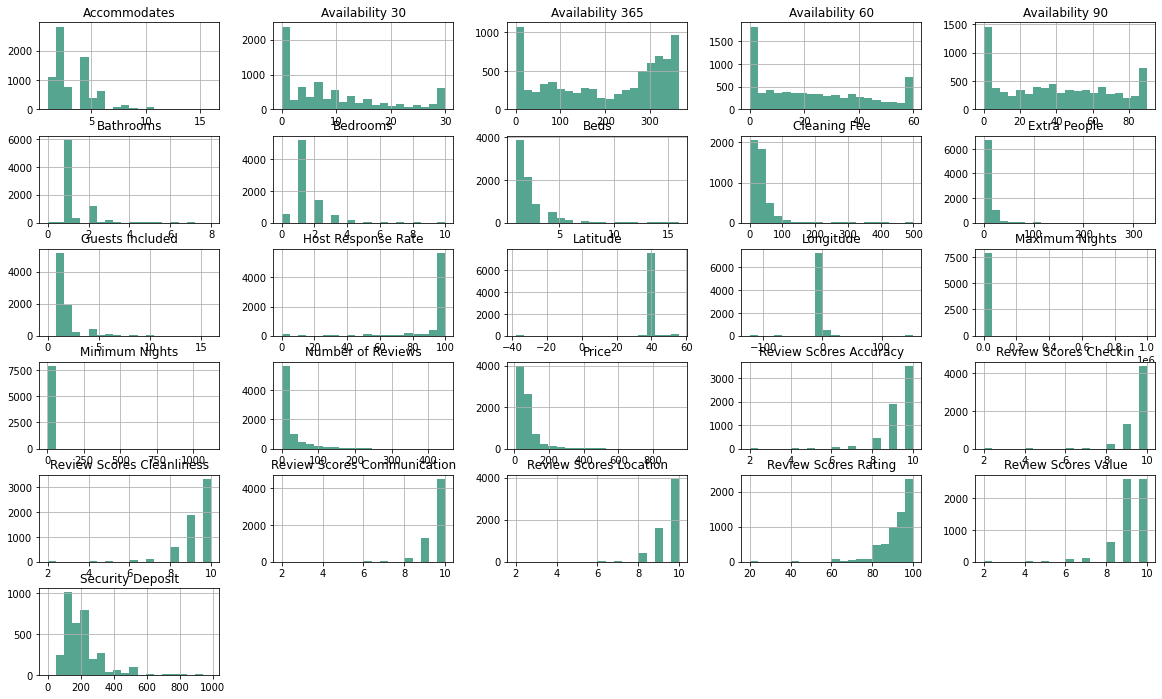

In [37]:
# Histograma completo
df_train.hist(figsize=(20,12),bins = 20, color="#007959AA")
plt.title("Histograma df_train")
plt.show()

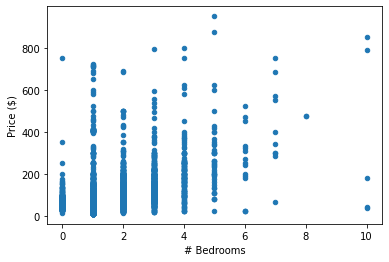

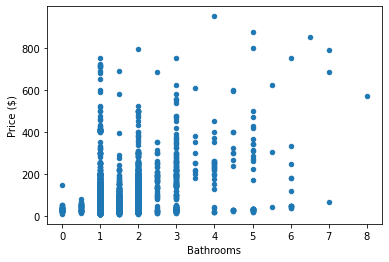

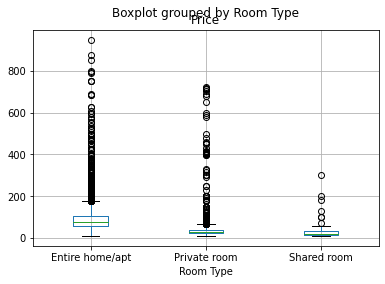

In [44]:
# Representamos 3: Bedrooms, Bathrooms y Room Type
# el resto se puede repetir una a una

df_train.plot(kind = 'scatter',x='Bedrooms',y = 'Price')
plt.xlabel('# Bedrooms')
plt.ylabel('Price ($)')
plt.show()

df_train.plot(kind = 'scatter',x='Bathrooms',y = 'Price')
plt.xlabel('Bathrooms')
plt.ylabel('Price ($)')
plt.show()

df_train.boxplot(by='Room Type',column = 'Price')
plt.show()

### **Aplicar filtros**

#### Filtro de alojamientos de Madrid

```
Analizamos las variables Country Code y City 
```



In [45]:
# Analizamos la variable Country Code
df_train['Country Code'].value_counts().head(10)

ES    7522
US      94
GB      88
FR      52
IT      37
IE      28
AU      21
NL      18
DE      17
AT      15
Name: Country Code, dtype: int64

In [46]:
# Analizamos la variable City
df_train['City'].value_counts().head(10)

Madrid       7097
Barcelona     161
London         76
Paris          51
马德里            32
Palma          27
Dublin         27
Alcúdia        21
New York       19
Brooklyn       18
Name: City, dtype: int64

In [47]:
# Filtro City  
list_of_madrid = ['Madrid', 'Madrid, Comunidad de Madrid, ES', 'madrid', 'MADRID', 'las matas  madrid', 
                  'Boadilla del Monte', 'Delicias-Madrid', 'Delicias', 'Aravaca (Madrid)', 
                  'Chueca, Madrid', 'Madrid, Comunidad de Madrid, ESPANA']

df_train_filtered = df_train[df_train['City'].isin(list_of_madrid)]

# Chequeo del filtro
check_filter(df_train, df_train_filtered)

Original: (7921, 55)
Modificado: (7115, 55)
10.1755% alojamientos filtrados


Aunque el porcentaje de alojamientos fuera de Madrid es elevado (10.1755%), optamos por aplicar el filtro para trabajar exclusivamente con registros ubicados en Madrid, y el resto de alojamientos con ubicaciones distintas de Madrid, los consideramos outliers.

In [48]:
df_train = df_train[df_train['City'].isin(list_of_madrid)]
print(f'Dimensiones datos entrenamiento son: {df_train.shape}')

Dimensiones datos entrenamiento son: (7115, 55)


#### Filtro Bathrooms y Bedrooms

```
Con el min del comando describe observamos que existen variables como Bathrooms y Bedrooms con valores a 0. 
Como la cifra de alojamientos con Bedrooms a 0 es elevada asumimos que existen alojamientos sin habitaciones 
pudiendo hacer uso del sofa, entonces únicamente optamos por filtrar únicamente los alojamientos con Bathrooms a 0
```



In [49]:
# Alojamientos con 0  Bedrooms
len(df_train[df_train['Bedrooms'] == 0])

477

In [50]:
# Alojamientos con 0  Bathrooms
len(df_train[df_train['Bathrooms'] == 0])

42

In [51]:
# Filter Bathrooms 
filter_bath0 = df_train['Bathrooms']!= 0
df_train_filtered = df_train[filter_bath0]

# Chequeo del filtro
check_filter(df_train, df_train_filtered)

Original: (7115, 55)
Modificado: (7073, 55)
0.5903% alojamientos filtrados


In [52]:
# Aplicamos el filtro
df_train = df_train_filtered

print(f'Dimensiones datos entrenamiento son: {df_train.shape}')

Dimensiones datos entrenamiento son: (7073, 55)


#### Filtro Price

```
Analizamos la variable objetivo Price
```

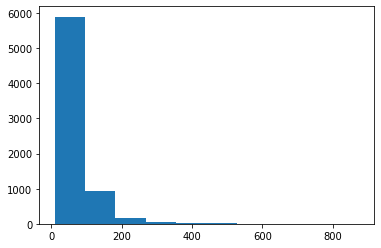

In [55]:
# Histograma para la variable objetivo Price
plt.hist(df_train['Price'], bins=10)
plt.show()

In [56]:
df_train['Price'].describe()

count    7067.000000
mean       66.466252
std        57.452101
min         9.000000
25%        32.000000
50%        53.000000
75%        80.000000
max       875.000000
Name: Price, dtype: float64

Price consta de valor mínimo de 9 y max de 875. Como hay un 1.3856% de alojamientos cuyo precio excede de 250, fijamos en dicho valor el umbral para considerar outliers, aquellos alojamentos cuyo precio excede de dicho umbral.

In [57]:
# Filter Price 
filter_price = df_train['Price'] <= 250
df_train_filtered = df_train[filter_price]

# Chequeo del filtro
check_filter(df_train, df_train_filtered)

Original: (7073, 55)
Modificado: (6975, 55)
1.3856% alojamientos filtrados


In [58]:
# Aplicamos el filtro para Price
df_train = df_train[filter_price]

print(f'Dimensiones datos entrenamiento son: {df_train.shape}')

Dimensiones datos entrenamiento son: (6975, 55)


#### Filtro imágenes

```
Analizamos la variable Thumbnail Url
```

In [59]:
check_column(df_train, 'Thumbnail Url')

Thumbnail Url consta de: 5685 valores distintos de un total de 6975
Thumbnail Url consta de: 1291 valores ausentes, 18.509%


In [60]:
# Eliminamos los registros ausentes de la variable Thumbnail Url para trabajar con muestras con imágenes
df_train.dropna(subset=['Thumbnail Url'], inplace=True)
print(f'Dimensiones datos entrenamiento son: {df_train.shape}')
check_column(df_train, 'Thumbnail Url')

Dimensiones datos entrenamiento son: (5684, 55)
Thumbnail Url consta de: 5684 valores distintos de un total de 5684
Thumbnail Url consta de: 0 valores ausentes, 0.0%


Aunque el porcentaje de alojamientos sin imagen asociada en la variable Thumbnail Url es elevado (18.509%), optamos por aplicar el filtro para trabajar exclusivamente con alojamientos con imagen asociada, y el resto de alojamientos sin imágen, los consideramos outliers.

*   Evaluar las correlaciones entre las diferente variables para identificar posibles atributos o variables que estén altamente correlacionados, con valores cercanos a 1 o -1.


In [61]:
# Matriz de correlación
df_train.corr() 

,Host Response Rate,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value
Host Response Rate,1.000000,-0.059239,-0.043291,0.078491,-0.069563,0.002522,0.041121,0.015395,-0.058195,0.003086,0.055470,0.046577,0.007483,0.001021,-0.116545,-0.086989,-0.078640,-0.040032,0.122419,0.036687,0.041602,0.063132,0.059429,0.044362,0.052255,0.070372
Latitude,-0.059239,1.000000,0.266121,-0.010855,0.038185,0.016627,0.012968,0.072099,0.125066,0.098950,-0.020579,0.037868,-0.020354,0.006602,0.067645,0.070408,0.061619,0.035884,-0.068800,0.004149,0.004514,0.002216,0.020972,0.021947,0.059381,-0.008397
Longitude,-0.043291,0.266121,1.000000,-0.041115,0.004507,0.019762,-0.015174,-0.020178,0.043751,-0.000163,-0.028714,-0.010790,-0.030553,-0.004734,0.056552,0.048458,0.043999,-0.013511,-0.044424,0.041636,0.039250,0.039911,0.034736,0.035974,-0.077387,0.036742
Accommodates,0.078491,-0.010855,-0.041115,1.000000,0.234577,0.636912,0.814742,0.635533,0.139442,0.444787,0.600917,0.310906,-0.039507,-0.003482,-0.067077,-0.051781,-0.055919,0.085863,0.111249,-0.045411,-0.047593,-0.004130,-0.048261,-0.022490,0.056772,-0.034132
Bathrooms,-0.069563,0.038185,0.004507,0.234577,1.000000,0.341887,0.291315,0.242543,0.155507,0.272872,0.139950,0.094258,0.115071,-0.005112,-0.035191,-0.047006,-0.041094,0.002893,-0.069284,0.010763,0.005850,0.008712,-0.046242,-0.023789,0.053878,0.011269
Bedrooms,0.002522,0.016627,0.019762,0.636912,0.341887,1.000000,0.641423,0.519482,0.168834,0.389797,0.427897,0.149374,0.010518,-0.004009,-0.033217,-0.038534,-0.047998,0.029807,-0.025826,0.020240,0.009110,0.014948,-0.016131,0.004623,0.011031,0.020567
Beds,0.041121,0.012968,-0.015174,0.814742,0.291315,0.641423,1.000000,0.496588,0.142527,0.368314,0.467503,0.240925,-0.017804,-0.004437,0.001185,0.007117,-0.003110,0.101113,0.047338,-0.041299,-0.070129,-0.013648,-0.044132,-0.018993,0.008939,-0.030563
Price,0.015395,0.072099,-0.020178,0.635533,0.242543,0.519482,0.496588,1.000000,0.311569,0.652204,0.461024,0.151764,0.025749,0.004822,-0.017844,-0.019176,-0.032426,0.087057,0.021621,0.072548,0.082069,0.105942,0.002092,0.040923,0.184773,0.048848
Security Deposit,-0.058195,0.125066,0.043751,0.139442,0.155507,0.168834,0.142527,0.311569,1.000000,0.418388,0.066942,0.019750,0.168535,0.006095,0.034650,0.028323,0.022569,0.045080,-0.142919,0.085056,0.063045,0.078152,0.028068,0.033567,0.036701,0.041980
Cleaning Fee,0.003086,0.098950,-0.000163,0.444787,0.272872,0.389797,0.368314,0.652204,0.418388,1.000000,0.315356,0.116856,0.139859,-0.004609,-0.019707,-0.015146,-0.021931,0.118183,-0.061955,-0.019117,-0.012009,0.049874,-0.071945,-0.004438,0.065773,-0.029576


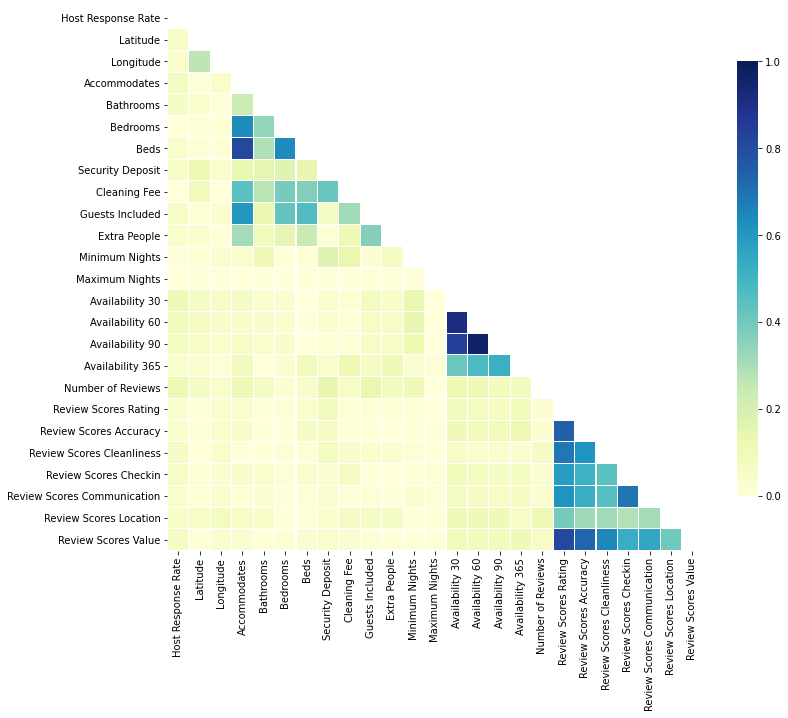

In [62]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(df_train.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

Con respecto a esta información, observamos que las siguientes variables tienen correlaciones por encima de 0.7

    Beds con Accommodates un 0.814742
    Availability 30 con Availability 60, un 0.913187 y con Availability 90, un 0.839062
    Availability 60 con Availavility 30, un 0.913187 y con Availability 90, un 0.961683 
    Review Scores Rating con Review Scores Accuracy, un 0.745815 y con Review Scores Value un 0.808649
    Review Scores Accuracy con Review Scores Value con un 0.726934

Entonces las decisiones a las que llegamos son:

    - Eliminar Accommodates por estar altamente correlacionada con Beds
    - Eliminar Availability 30, Availability 60 y Availability 90 pq están correlacionadas entre si.
    - Mantener la variable Availability 365  (The number of days for which a particular host is available in a year)
    - Eliminar Review Scores Accuracy, Review Scores Cleanliness, Review Scores Checkin, Review Scores Communication 
    y Review Scores Location  pq están correlacionadas entre sí. 
    - Crear la variable Review Scores Mean con la media de las columnas Review Scores XXX para después eliminarlas 

In [63]:
# Dataframe con las columnas desde Review Scores Rating hasta Review Scores Value 
# para generar una nueva característica con la media de todas ellas
df_review = df_train.loc[:,'Review Scores Rating':'Review Scores Value']

df_train['Review Scores Mean'] = df_review.mean(axis=1)

# Columnas a eliminar porque una alta correlación y esto origina valores redundantes
columns_4drop = ['Accommodates', 'Availability 30', 'Availability 60', 'Availability 90',
                'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin',
                'Review Scores Communication', 'Review Scores Location', 
                'Review Scores Rating', 'Review Scores Value']

# Drop specified labels from columns
df_train.drop(columns_4drop, axis=1, inplace=True)  

print(f'Dimensiones datos entrenamiento son: {df_train.shape}')

Dimensiones datos entrenamiento son: (5684, 45)


Analizamos las variables:

```
  Name
  Summary
  Space
  Description
  Notes
  Transit
  Access
  Interaction
  House Rules
  Features
```

Con algunas de estas variables, tales como Notes o House Rules y Accesss podríamos obtener cierta información para dar más peso a ciertos alojamientos pero como no sé si me dará tiempo a analizar las herramientas para NLP (Natural Language Processing) procederé a eliminarlas.

In [64]:
# Notes nos podría servir para detectar que los alojamientos disponen de PARKING, Zona gratis para aparcar el coche, así
# como detectar si se permiten mascotas o está permitido Smoking para dar más peso a unos alojamientos que a otros.
df_train['Notes'][0:8]   # Smoking

0                                                  NaN
1                                                  NaN
2                                                  NaN
3    -Podéis fumar lo que queráis, pero siempre en ...
5                                                  NaN
6                                                  NaN
8                                                  NaN
9    This is a quiet building community, please obs...
Name: Notes, dtype: object

In [65]:
# Con transit 
df_train['Transit'][0:8] 

0                                                  NaN
1    Metro conde de Casal abajo de casa . Líneas de...
2    From Barajas Airport take the BUS 200 (1,50€) ...
3    Precio billete cercanías: 1,70€ Precio billete...
5    Desde aquí llegarás a todos sitios andando per...
6                                                  NaN
8                                                  NaN
9    If you come by plane, taxi is a good option 30...
Name: Transit, dtype: object

In [66]:
# Con esta variable podríamos seleccionar una lista de accesorios tales como Wifi, washing machine, microware, fully equipped,
# central heating, oven, por dishwasher, elevator, TV, ... para del mismo modo elevar los pesos de los alojamientos.
df_train['Access'][0:8]

0                                                  NaN
1          Pueden usar la nevera , microondas , wifi .
2                                                  NaN
3    Podéis usar el baño, la cocina, el balcón... P...
5                                                  NaN
6                                                  NaN
8                                                  NaN
9    The rental rate includes: Free wifi Bed linen ...
Name: Access, dtype: object

In [67]:
# Con esta variable podríamos obtener ciertas reglas tales como No Smoking, permitido fumar, No parties inside, No pets,...
# y el horario de entrada check in y salida check out .... 
df_train['House Rules'][0:8] 

0                                                  NaN
1    Si son fumadores podéis  fumar en un patio Q h...
2                                                  NaN
3                                                  NaN
5                                                  NaN
6                                                  NaN
8                                                  NaN
9    Disfrutad y tratad la casa como si fuera vuest...
Name: House Rules, dtype: object

In [68]:
df_train['Features'][0:8] 

0    Host Has Profile Pic,Requires License,Instant ...
1    Host Has Profile Pic,Requires License,Instant ...
2    Host Has Profile Pic,Is Location Exact,Require...
3    Host Has Profile Pic,Host Identity Verified,Is...
5    Host Has Profile Pic,Host Identity Verified,Re...
6    Host Has Profile Pic,Is Location Exact,Require...
8    Host Has Profile Pic,Host Identity Verified,Is...
9    Host Has Profile Pic,Host Identity Verified,Is...
Name: Features, dtype: object

In [69]:
# Columnas a eliminar 
columns_6drop = ['Name', 'Summary', 'Space', 'Description', 'Notes', 'Transit', 'Access', 'Interaction', 
                'House Rules', 'Features']

# Drop specified labels from columns
df_train.drop(columns_6drop, axis=1, inplace=True)  

print(f'Dimensiones datos entrenamiento son: {df_train.shape}')

Dimensiones datos entrenamiento son: (5684, 35)


Vamos a analizar las variables de tipo objeto

In [70]:
# Return a subset of the DataFrame's columns based on the column dtypes.

df_train.select_dtypes(include='object').columns

Index(['Experiences Offered', 'Neighborhood Overview', 'Thumbnail Url',
       'Host Since', 'Host Response Time', 'Host Verifications',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'Country Code', 'Property Type',
       'Room Type', 'Bed Type', 'Amenities', 'Calendar Updated',
       'First Review', 'Last Review', 'Cancellation Policy'],
      dtype='object')

Analizamos el bloque de variables:

    Experiences Offered
    Neighborhood Overview
    Host Response Time
    Host Verifications

In [71]:
# Variable Experiences Offered con valor none en todos los registros --> no aporta información se puede eliminar
check_column(df_train, 'Experiences Offered')
df_train['Experiences Offered'].value_counts().head()

Experiences Offered consta de: 1 valores distintos de un total de 5684
Experiences Offered consta de: 0 valores ausentes, 0.0%


none    5684
Name: Experiences Offered, dtype: int64

In [72]:
# Neighborhood Overview consta de un 36.80% de valores ausentes con lo que descartamos un tratamiento por NLP y
# por tanto descartamos dicha variable
check_column(df_train, 'Neighborhood Overview')
df_train['Neighborhood Overview'].value_counts().head()

Neighborhood Overview consta de: 3303 valores distintos de un total de 5684
Neighborhood Overview consta de: 2042 valores ausentes, 35.9254%


Callao is one of the most popular plazas in Madrid. It sits right on the edge of Madrid’s Theatre district, the very popular city centre Sol and beautiful Royal district of Opera. Plaza Callao is Madrids own version of Times Square with its tall buildings, busy streets and constant hustle and bustle. Not only is Callao great for it’s central location, it is a perfect spot for those interested in the theatre and cinema of Spain. All year round there are a wide variety of plays, musicals, movies and even special movie premiers. The neighborhood is a perfect mix between classic 1920’s and modern architecture – which makes it a great place to explore. And don’t forget about the shopping! The streets along Callao are some of the best in the city for clothing, shoes, makeup and technology. The flat is located in Calle Preciados and just 1 minute away from Plaza Callao. The area surrounding the building is a known spot for good restaurants and entertainment.                                   

In [73]:
# Host Response Time --> variable a categorizar
check_column(df_train, 'Host Response Time')
df_train['Host Response Time'].value_counts().head()

Host Response Time consta de: 5 valores distintos de un total de 5684
Host Response Time consta de: 695 valores ausentes, 12.2273%


within an hour        3383
within a few hours    1015
within a day           516
a few days or more      75
Name: Host Response Time, dtype: int64

In [74]:
# Sustituimos los valores ausentes por la moda, es decir el valor que más se repite, en este caso within an hour
df_train['Host Response Time'].fillna(df_train['Host Response Time'].mode()[0], inplace=True)

check_column(df_train, 'Host Response Time')

Host Response Time consta de: 4 valores distintos de un total de 5684
Host Response Time consta de: 0 valores ausentes, 0.0%


In [75]:
# Host Verifications  --> variable a tratar 
check_column(df_train, 'Host Verifications')
df_train['Host Verifications'].value_counts().head()

Host Verifications consta de: 152 valores distintos de un total de 5684
Host Verifications consta de: 2 valores ausentes, 0.0352%


email,phone,reviews                        1392
email,phone,reviews,jumio                  1260
email,phone,reviews,jumio,government_id     377
email,phone,facebook,reviews                299
email,phone,facebook,reviews,jumio          294
Name: Host Verifications, dtype: int64

In [76]:
df_train['Host Verifications'].mode()

0    email,phone,reviews
dtype: object

In [77]:
# Sustituimos los valores ausentes por la moda, es decir el valor que más se repite, en este caso email,phone,reviews
df_train['Host Verifications'].fillna(df_train['Host Verifications'].mode()[0], inplace=True)

check_column(df_train, 'Host Verifications')

Host Verifications consta de: 151 valores distintos de un total de 5684
Host Verifications consta de: 0 valores ausentes, 0.0%


In [78]:
# Data frame con la mode de las columnas para aplicarlo en el conjunto de validation y test
df_mode = pd.DataFrame({'variables': ['Host Response Time', 'Host Verifications'], 
                        'moda': [df_train['Host Response Time'].mode()[0], df_train['Host Verifications'].mode()[0]]})
df_mode

,variables,moda
0,Host Response Time,within an hour
1,Host Verifications,"email,phone,reviews"


In [79]:
# First Review
check_column(df_train, 'First Review')
df_train['First Review'].value_counts().head()

First Review consta de: 1205 valores distintos de un total de 5684
First Review consta de: 1137 valores ausentes, 20.0035%


2016-09-11    36
2017-02-19    31
2017-02-26    29
2017-04-02    26
2016-12-11    25
Name: First Review, dtype: int64

In [80]:
# Last Review
check_column(df_train, 'Last Review')
df_train['Last Review'].value_counts().head()

Last Review consta de: 472 valores distintos de un total de 5684
Last Review consta de: 1137 valores ausentes, 20.0035%


2017-04-02    380
2017-03-26    226
2017-04-03    200
2017-03-19    173
2017-04-04    148
Name: Last Review, dtype: int64

Analizamos el bloque de variables:

    Neighbourhood
    Neighbourhood Cleansed
    Neighbourhood Group Cleansed

In [81]:
# Dataframe con dichas columnas o variables
df_neigh = df_train[['Neighbourhood', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed']]

df_neigh.head(10)

,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed
0,NaN,Ciudad Jardín,Chamartín
1,NaN,Niño Jesús,Retiro
2,Guindalera,Guindalera,Salamanca
3,Villaverde,Los Rosales,Villaverde
5,NaN,Embajadores,Centro
6,Recoletos,Recoletos,Salamanca
8,San Blas,Simancas,San Blas - Canillejas
9,Cortes,Cortes,Centro
10,Hispanoamérica,Hispanoamérica,Chamartín
11,Argüelles,Argüelles,Moncloa - Aravaca


In [82]:
# Detect missing values en Pandas (isnull or isna )
# Count the Null Columns
null_columns = df_neigh.columns[df_neigh.isnull().any()]
df_neigh[null_columns].isnull().sum()

Neighbourhood    1950
dtype: int64

In [83]:
df_neigh.apply(lambda x: len(x.unique()))

Neighbourhood                    66
Neighbourhood Cleansed          125
Neighbourhood Group Cleansed     21
dtype: int64

In [84]:
# Neighbourhood
check_column(df_train, 'Neighbourhood')
# Neighbourhood Cleansed
check_column(df_train, 'Neighbourhood Cleansed')
# Neighbourhood Group Cleansed
check_column(df_train, 'Neighbourhood Group Cleansed')

Neighbourhood consta de: 66 valores distintos de un total de 5684
Neighbourhood consta de: 1950 valores ausentes, 34.3068%
Neighbourhood Cleansed consta de: 125 valores distintos de un total de 5684
Neighbourhood Cleansed consta de: 0 valores ausentes, 0.0%
Neighbourhood Group Cleansed consta de: 21 valores distintos de un total de 5684
Neighbourhood Group Cleansed consta de: 0 valores ausentes, 0.0%


In [85]:
# Sustituimos los valores ausentes de la variable Neighbourhood por la variable Neighvourhood Group Cleansed
df_train['Neighbourhood'].fillna(df_train['Neighbourhood Group Cleansed'], inplace=True)

check_column(df_train, 'Neighbourhood')

Neighbourhood consta de: 71 valores distintos de un total de 5684
Neighbourhood consta de: 0 valores ausentes, 0.0%


Analisis de las variables:
    
      City 
      Country Code   
      Property Type
      Room Type
      Bed Type

In [86]:
# Variable City y Country Code validamos que la muestra es en ES Madrid con el filtrado 
# realizado previamente para justificar el drop de dichas columnas o variables
check_column(df_train, 'City')
check_column(df_train, 'Country Code')
df_train['Country Code'].value_counts().head()

City consta de: 9 valores distintos de un total de 5684
City consta de: 0 valores ausentes, 0.0%
Country Code consta de: 1 valores distintos de un total de 5684
Country Code consta de: 0 valores ausentes, 0.0%


ES    5684
Name: Country Code, dtype: int64

In [87]:
# Variables Property Type, Room Type, Bed Type 
check_column(df_train, 'Property Type')
check_column(df_train, 'Room Type')
check_column(df_train, 'Bed Type')

Property Type consta de: 19 valores distintos de un total de 5684
Property Type consta de: 0 valores ausentes, 0.0%
Room Type consta de: 3 valores distintos de un total de 5684
Room Type consta de: 0 valores ausentes, 0.0%
Bed Type consta de: 5 valores distintos de un total de 5684
Bed Type consta de: 0 valores ausentes, 0.0%


Analisis de las variables:

    Amenities
    Calendar Updated                      
    Cancellation Policy 

In [88]:
# Amenities  --> variable a tratar 
check_column(df_train, 'Amenities')
df_train['Amenities'].value_counts().head()

Amenities consta de: 5126 valores distintos de un total de 5684
Amenities consta de: 38 valores ausentes, 0.6685%


TV,Internet,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace        15
translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50                                                                                                                                                13
Family/kid friendly                                                                                                                                                                                                                  12
TV,Wireless Internet,Kitchen,Elevator in building,Heating,Washer,Lock on bedroom door,Hangers,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50,Private living room    12
Wireless Internet,Heating,Fire extinguisher,Lock on bedroom door,transla

In [89]:
# En este caso decido sustituir los valores ausentes por "" para que en caso de tratar dicha variable la interpretación
# sea más objetiva que con respecto al resto de alojamientos

df_train['Amenities'].fillna("", inplace=True)
check_column(df_train, 'Amenities')

Amenities consta de: 5126 valores distintos de un total de 5684
Amenities consta de: 0 valores ausentes, 0.0%


In [90]:
# Calendar Updated
check_column(df_train, 'Calendar Updated')
df_train['Calendar Updated'].value_counts().head()

Calendar Updated consta de: 48 valores distintos de un total de 5684
Calendar Updated consta de: 0 valores ausentes, 0.0%


today          1481
yesterday       525
2 weeks ago     459
a week ago      436
3 days ago      355
Name: Calendar Updated, dtype: int64

In [91]:
# Cancellation Policy 
check_column(df_train, 'Cancellation Policy')
df_train['Cancellation Policy'].value_counts().head()

Cancellation Policy consta de: 5 valores distintos de un total de 5684
Cancellation Policy consta de: 0 valores ausentes, 0.0%


strict             2114
flexible           1848
moderate           1720
super_strict_30       1
super_strict_60       1
Name: Cancellation Policy, dtype: int64

In [92]:
# Columnas a eliminar según el análisis realizado
columns_7drop = ['Experiences Offered', 'Neighborhood Overview', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed',
                 'City', 'Country Code', 'First Review', 'Last Review', 'Host Since']

# Drop specified labels from columns
df_train.drop(columns_7drop, axis=1, inplace=True)  

print(f'Dimensiones datos entrenamiento son: {df_train.shape}')

Dimensiones datos entrenamiento son: (5684, 26)


In [93]:
# Creación de nuevas características a partir de las variables Host Verifications y Amenities
# Ambas variables contienen información separada por coma, de manera que podemos contabilizar el nº de elementos
# para así tenerlo en cuenta como una nueva característica para estas variables
df_train['Host Verifications'] = df_train['Host Verifications'].apply(lambda x: len(str(x).split(',')))
df_train['Amenities'] = df_train['Amenities'].apply(lambda x: len(str(x).split(',')))

In [ ]:
df_train.head(3)

,Thumbnail Url,Host Response Time,Host Response Rate,Host Verifications,Neighbourhood,Latitude,Longitude,Property Type,Room Type,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Availability 365,Number of Reviews,Cancellation Policy,Review Scores Mean
0,https://a0.muscache.com/im/pictures/2ef95799-b...,within an hour,80.0,3,Chamartín,40.444465,-3.677218,Apartment,Private room,1.0,1.0,1.0,Real Bed,13,15.0,NaN,NaN,1,0,1,1125,7 weeks ago,97,0,flexible,NaN
1,https://a0.muscache.com/im/pictures/86864154/1...,within an hour,84.0,3,Retiro,40.406953,-3.670894,Apartment,Private room,2.0,1.0,1.0,Real Bed,7,28.0,NaN,NaN,1,5,1,1125,2 weeks ago,240,171,flexible,20.142857
2,https://a0.muscache.com/im/pictures/93de63f8-c...,within an hour,100.0,3,Guindalera,40.435710,-3.673660,Apartment,Private room,1.0,1.0,1.0,Real Bed,9,21.0,NaN,NaN,1,18,1,1125,2 weeks ago,66,0,strict,NaN


#### **Categorización de las variables categóricas**


Realizamos la categorización de estas variables a través de mean encoding

    Host Response Time
    Neighbourhood
    Property Type
    Room Type
    Bed Type
    Calendar Updated
    Cancellation Policy
Mean encoding is similar to label encoding, except here labels are correlated directly with the target

In [94]:
df_train.select_dtypes(include='object').columns

Index(['Thumbnail Url', 'Host Response Time', 'Neighbourhood', 'Property Type',
       'Room Type', 'Bed Type', 'Calendar Updated', 'Cancellation Policy'],
      dtype='object')

In [95]:
# categ_variables: list of variables to encode
categ_variables = ['Host Response Time', 'Neighbourhood', 'Property Type', 'Room Type', 'Bed Type',
                   'Calendar Updated', 'Cancellation Policy']

# mean_map: dict, mapping to be used on validation/test datasets 
mean_map = dict()    
for v in categ_variables:
    mean_encode = df_train.groupby(v)['Price'].mean()
    df_train[v]=df_train[v].map(mean_encode)
    mean_map[v] = mean_encode

In [96]:
mean_map

{'Bed Type': Bed Type
 Airbed           58.500000
 Couch            52.750000
 Futon            36.235294
 Pull-out Sofa    53.794118
 Real Bed         58.967620
 Name: Price, dtype: float64, 'Calendar Updated': Calendar Updated
 1 week ago        53.567568
 10 months ago     56.448276
 11 months ago     46.785714
 12 months ago     51.333333
 13 months ago     44.846154
 14 months ago     60.750000
 15 months ago     41.923077
 16 months ago     55.857143
 17 months ago     33.000000
 18 months ago     99.500000
 19 months ago     44.666667
 2 days ago        57.793750
 2 months ago      46.937759
 2 weeks ago       52.108932
 20 months ago     44.000000
 21 months ago     48.636364
 22 months ago     60.714286
 23 months ago     33.333333
 24 months ago     77.500000
 25 months ago     15.000000
 29 months ago     51.500000
 3 days ago        56.307042
 3 months ago      51.062500
 3 weeks ago       56.242857
 30 months ago    217.500000
 31 months ago     80.000000
 35 months ago   

In [97]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Response Time,5684.0,58.802252,3.475043,50.313953,55.348768,60.561795,60.561795,68.266667
Host Response Rate,4989.0,96.173582,12.625121,0.000000,100.000000,100.000000,100.000000,100.000000
Host Verifications,5684.0,4.150070,1.326312,1.000000,3.000000,4.000000,5.000000,10.000000
Neighbourhood,5684.0,58.802252,14.485432,30.084507,49.708333,58.884024,66.074627,117.760000
Latitude,5684.0,40.420858,0.021264,40.332908,40.409846,40.418868,40.428463,40.562736
Longitude,5684.0,-3.696532,0.024952,-3.863907,-3.708047,-3.701389,-3.693027,-3.575142
Property Type,5684.0,58.802252,5.956859,20.000000,60.476067,60.476067,60.476067,140.000000
Room Type,5684.0,58.802252,23.220729,29.385714,33.028398,79.631629,79.631629,79.631629
Bathrooms,5667.0,1.243692,0.566907,0.500000,1.000000,1.000000,1.000000,7.000000
Bedrooms,5673.0,1.257183,0.737827,0.000000,1.000000,1.000000,1.000000,10.000000


Aún quedan variables numéricas con valores ausentes como:
    
    Host Response Rate
    Bathrooms
    Bedrooms
    Beds
    Security Deposit
    Cleaning Fee
    Review Scores Mean 

In [98]:
# Columnas o variables aún con valores ausentes
null_columns = df_train.columns[df_train.isnull().any()]

null_columns

Index(['Host Response Rate', 'Bathrooms', 'Bedrooms', 'Beds',
       'Security Deposit', 'Cleaning Fee', 'Review Scores Mean'],
      dtype='object')

In [99]:
# Análisis de la variable Host Response Time
check_column(df_train, 'Host Response Time')

Host Response Time consta de: 4 valores distintos de un total de 5684
Host Response Time consta de: 0 valores ausentes, 0.0%


In [100]:
# Data frame con la media para las columnas o variables con valores ausentes
df_mean = dict()
for v in null_columns:
    df_mean[v] = df_train[v].mean()

In [101]:
df_mean

{'Bathrooms': 1.2436915475560262,
 'Bedrooms': 1.257183148246078,
 'Beds': 1.893361581920904,
 'Cleaning Fee': 26.75395168505816,
 'Host Response Rate': 96.1735818801363,
 'Review Scores Mean': 21.29898865005396,
 'Security Deposit': 174.77541666666667}

In [102]:
# Sustituimos los valores ausentes por la media
df_train.fillna(df_train.mean(), inplace = True)

In [103]:
df_train.describe()

,Host Response Time,Host Response Rate,Host Verifications,Neighbourhood,Latitude,Longitude,Property Type,Room Type,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Availability 365,Number of Reviews,Cancellation Policy,Review Scores Mean
count,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000
mean,58.802252,96.173582,4.150070,58.802252,40.420858,-3.696532,58.802252,58.802252,1.243692,1.257183,1.893362,58.802252,14.420127,58.802252,174.775417,26.753952,1.540992,7.136700,2.385468,1062.760028,58.802252,200.348346,25.248593,58.802252,21.298989
std,3.475043,11.827963,1.326312,14.485432,0.021264,0.024952,5.956859,23.220729,0.566059,0.737112,1.348326,1.423427,4.689417,39.434191,63.605575,13.775416,1.018520,9.697309,2.190651,13456.857220,11.014624,126.794187,40.411063,6.264145,1.612376
min,50.313953,0.000000,1.000000,30.084507,40.332908,-3.863907,20.000000,29.385714,0.500000,0.000000,1.000000,36.235294,1.000000,9.000000,70.000000,4.000000,1.000000,0.000000,1.000000,1.000000,15.000000,0.000000,0.000000,50.972944,5.142857
25%,55.348768,96.173582,3.000000,49.708333,40.409846,-3.708047,60.476067,33.028398,1.000000,1.000000,1.000000,58.967620,11.000000,30.000000,174.775417,20.000000,1.000000,0.000000,1.000000,360.000000,51.872340,78.000000,1.000000,50.972944,21.000000
50%,60.561795,100.000000,4.000000,58.884024,40.418868,-3.701389,60.476067,79.631629,1.000000,1.000000,1.000000,58.967620,14.000000,50.000000,174.775417,26.753952,1.000000,0.000000,2.000000,1125.000000,56.307042,233.500000,9.000000,58.435465,21.298989
75%,60.561795,100.000000,5.000000,66.074627,40.428463,-3.693027,60.476067,79.631629,1.000000,1.000000,2.000000,58.967620,17.000000,75.000000,174.775417,26.753952,2.000000,12.000000,3.000000,1125.000000,74.790007,317.000000,31.000000,65.910596,22.285714
max,68.266667,100.000000,10.000000,117.760000,40.562736,-3.575142,140.000000,79.631629,7.000000,10.000000,16.000000,58.967620,31.000000,250.000000,900.000000,200.000000,15.000000,276.000000,27.000000,1000000.000000,217.500000,365.000000,446.000000,100.000000,54.000000


In [104]:
df_train.dtypes

Thumbnail Url           object
Host Response Time     float64
Host Response Rate     float64
Host Verifications       int64
Neighbourhood          float64
Latitude               float64
Longitude              float64
Property Type          float64
Room Type              float64
Bathrooms              float64
Bedrooms               float64
Beds                   float64
Bed Type               float64
Amenities                int64
Price                  float64
Security Deposit       float64
Cleaning Fee           float64
Guests Included          int64
Extra People             int64
Minimum Nights           int64
Maximum Nights           int64
Calendar Updated       float64
Availability 365         int64
Number of Reviews        int64
Cancellation Policy    float64
Review Scores Mean     float64
dtype: object

In [105]:
df_train.head(3)

,Thumbnail Url,Host Response Time,Host Response Rate,Host Verifications,Neighbourhood,Latitude,Longitude,Property Type,Room Type,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Availability 365,Number of Reviews,Cancellation Policy,Review Scores Mean
0,https://a0.muscache.com/im/pictures/2ef95799-b...,60.561795,80.0,3,66.074627,40.444465,-3.677218,60.476067,33.028398,1.0,1.0,1.0,58.96762,13,15.0,174.775417,26.753952,1,0,1,1125,39.689655,97,0,50.972944,21.298989
1,https://a0.muscache.com/im/pictures/86864154/1...,60.561795,84.0,3,55.557143,40.406953,-3.670894,60.476067,33.028398,2.0,1.0,1.0,58.96762,7,28.0,174.775417,26.753952,1,5,1,1125,52.108932,240,171,50.972944,20.142857
2,https://a0.muscache.com/im/pictures/93de63f8-c...,60.561795,100.0,3,45.984615,40.435710,-3.673660,60.476067,33.028398,1.0,1.0,1.0,58.96762,9,21.0,174.775417,26.753952,1,18,1,1125,52.108932,66,0,65.910596,21.298989


In [106]:
print(f'Dimensiones datos entrenamiento son: {df_train.shape}')

Dimensiones datos entrenamiento son: (5684, 26)


In [ ]:
# Guardamos el dataset de training con el procesado de los datos
df_train.to_csv('/content/drive/My Drive/df_train_preprocesado.csv', sep=';', decimal='.', index=False)

In [ ]:
# Comprobar que tenemos el dataset
!ls -lah /content/drive/My\ Drive/df_train_preprocesado.csv

-rw------- 1 root root 1.9M Jun 19 20:12 '/content/drive/My Drive/df_train_preprocesado.csv'


In [107]:
# Cambiamos la posición de la columna Price en la posición primera
df_train = change_column_order(df_train, 'Price', 0)

In [108]:
df_train.columns.tolist()

['Price',
 'Thumbnail Url',
 'Host Response Time',
 'Host Response Rate',
 'Host Verifications',
 'Neighbourhood',
 'Latitude',
 'Longitude',
 'Property Type',
 'Room Type',
 'Bathrooms',
 'Bedrooms',
 'Beds',
 'Bed Type',
 'Amenities',
 'Security Deposit',
 'Cleaning Fee',
 'Guests Included',
 'Extra People',
 'Minimum Nights',
 'Maximum Nights',
 'Calendar Updated',
 'Availability 365',
 'Number of Reviews',
 'Cancellation Policy',
 'Review Scores Mean']

In [109]:
from sklearn import preprocessing

# convertimos el DataFrame al formato necesario para scikit-learn
data = df_train.values

y_train = data[:,0:1]     # nos quedamos con la 1ª columna, Price
X_train = data[:,2:]      # nos quedamos con el resto salvo la columna Thumbnail Url 

feature_names = df_train.columns[2:]

# Escalamos (con los datos de train)  - StandardScaler (x- media/desviación)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

#### **Preprocesado en el conjunto de validación y test**


In [ ]:
#df_val = pd.read_csv('/content/drive/My Drive/airbnb_val_rg.csv', sep=';', decimal='.')  

In [110]:
print(f'Datos validation: {df_val.shape}')    

Datos validation: (1981, 89)


In [111]:
# Preprocesado del dataset de validación df_val
columns_1drop = ['Listing Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 
                'Host URL', 'Host Thumbnail Url', 'Host Picture Url', 
                'ID', 'Scrape ID', 'Last Scraped', 'Calendar last Scraped', 'Weekly Price', 'Monthly Price',
                'Reviews per Month', 'Geolocation', 
                'Host ID', 'Host Name', 'Host Location', 'Host About', 'Host Neighbourhood',
                'Host Listings Count', 'Host Total Listings Count', 'Calculated host listings count']
df_val.drop(columns_1drop, axis=1, inplace=True)  
print(f'Dimensiones datos validación tras columns_1drop son: {df_val.shape}')

# Columnas a eliminar porque tiene un porcentaje superior al 90% de valores perdidos
columns_2drop = ['Host Acceptance Rate', 'Square Feet', 'Has Availability', 'License', 'Jurisdiction Names']
df_val.drop(columns_2drop, axis=1, inplace=True)  
print(f'Dimensiones datos validación tras columns_2drop son: {df_val.shape}')

# Columnas a eliminar porque la información la podemos obtener de las variables Neighbourdhood, City y County Code
columns_3drop = ['Street', 'State', 'Zipcode', 'Market', 'Smart Location', 'Country']
df_val.drop(columns_3drop, axis=1, inplace=True)  
print(f'Dimensiones datos validación tras columns_3drop son: {df_val.shape}')

# Filtro City  (alojamientos de Madrid)
list_of_madrid = ['Madrid', 'Madrid, Comunidad de Madrid, ES', 'madrid', 'MADRID', 'las matas  madrid', 
                  'Boadilla del Monte', 'Delicias-Madrid', 'Delicias', 'Aravaca (Madrid)', 
                  'Chueca, Madrid', 'Madrid, Comunidad de Madrid, ESPANA']

df_filtered = df_val[df_val['City'].isin(list_of_madrid)]
# Chequeo del filtro
check_filter(df_val, df_filtered)
df_val = df_val[df_val['City'].isin(list_of_madrid)]
print(f'Dimensiones datos validación tras el filtro de City son: {df_val.shape}')

# Filter Bathrooms 
filter_bath0 = df_val['Bathrooms']!= 0
df_filtered = df_val[filter_bath0]
# Chequeo del filtro
check_filter(df_val, df_filtered)
# Aplicamos el filtro
df_val = df_filtered
print(f'Dimensiones datos validación tras el filtro de Bathrooms son: {df_val.shape}')

# Filter Price 
filter_price = df_val['Price'] <= 250
df_filtered = df_val[filter_price]
# Chequeo del filtro
check_filter(df_val, df_filtered)
# Aplicamos el filtro para Price
df_val = df_val[filter_price]
print(f'Dimensiones datos validación tras el filtro de Price son: {df_val.shape}')

# Eliminamos los registros ausentes de la variable Thumbnail Url para trabajar con muestras con imágenes
df_val.dropna(subset=['Thumbnail Url'], inplace=True)
print(f'Dimensiones datos validación tras el filtro de Thumbnail Url son: {df_val.shape}')
check_column(df_val, 'Thumbnail Url')

# Dataframe con las columnas desde Review Scores Rating hasta Review Scores Value 
# para generar una nueva característica con la media de todas ellas
df_review = df_val.loc[:,'Review Scores Rating':'Review Scores Value']
df_val['Review Scores Mean'] = df_review.mean(axis=1)

# Columnas a eliminar porque una alta correlación y esto origina valores redundantes
columns_4drop = ['Accommodates', 'Availability 30', 'Availability 60', 'Availability 90',
                'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin',
                'Review Scores Communication', 'Review Scores Location', 
                'Review Scores Rating', 'Review Scores Value']
df_val.drop(columns_4drop, axis=1, inplace=True) 
print(f'Dimensiones datos validación tras columns_4drop son: {df_val.shape}')

# Columnas a eliminar 
columns_6drop = ['Name', 'Summary', 'Space', 'Description', 'Notes', 'Transit', 'Access', 'Interaction', 
                'House Rules', 'Features']
df_val.drop(columns_6drop, axis=1, inplace=True)  
print(f'Dimensiones datos validación tras columns_6drop son: {df_val.shape}')   

# Sustituimos los valores ausentes por la moda, es decir el valor que más se repite, en este caso within an hour
df_val['Host Response Time'].fillna(df_mode['moda'][0], inplace=True)
# Sustituimos los valores ausentes por la moda, es decir el valor que más se repite, en este caso email,phone,reviews
df_val['Host Verifications'].fillna(df_mode['moda'][1], inplace=True)

# Sustituimos los valores ausentes de la variable Neighbourhood por la variable Neighvourhood Group Cleansed
df_val['Neighbourhood'].fillna(df_val['Neighbourhood Group Cleansed'], inplace=True)
check_column(df_val, 'Neighbourhood')

# En este caso decido sustituir los valores ausentes por "" para que en caso de tratar dicha variable la interpretación
# sea más objetiva que con respecto al resto de alojamientos
df_val['Amenities'].fillna("", inplace=True)

# Columnas a eliminar según el análisis realizado
columns_7drop = ['Experiences Offered', 'Neighborhood Overview', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed',
                 'City', 'Country Code', 'First Review', 'Last Review', 'Host Since']
df_val.drop(columns_7drop, axis=1, inplace=True)  
print(f'Dimensiones datos validación tras columns_7drop son: {df_val.shape}')

# Creación de nuevas características a partir de las variables Host Verifications y Amenities
# Ambas variables contienen información separada por coma, de manera que podemos contabilizar el nº de elementos
# para así tenerlo en cuenta como una nueva característica para estas variables
df_val['Host Verifications'] = df_val['Host Verifications'].apply(lambda x: len(str(x).split(',')))
df_val['Amenities'] = df_val['Amenities'].apply(lambda x: len(str(x).split(',')))

# categ_variables: list of variables to encode
categ_variables = ['Host Response Time', 'Neighbourhood', 'Property Type', 'Room Type', 'Bed Type',
                   'Calendar Updated', 'Cancellation Policy']
# mean_map: dict, mapping to be used on validation/test datasets  
for v in categ_variables:
    df_val[v]=df_val[v].map(mean_map[v])

# Eliminamos 1 registro ausente de la variable Property Type
check_column(df_val, 'Property Type')
df_val.dropna(subset=['Property Type'], inplace=True)
check_column(df_val, 'Property Type')

# Eliminamos 1 registro ausente de la variable Calendar Updated
check_column(df_val, 'Calendar Updated')
df_val.dropna(subset=['Calendar Updated'], inplace=True)
check_column(df_val, 'Calendar Updated')

# Columnas o variables aún con valores ausentes
null_columns = df_val.columns[df_val.isnull().any()]

# Data frame con la media para las columnas o variables con valores ausentes
for v in null_columns:
    df_val[v] = df_mean[v]


Dimensiones datos validación tras columns_1drop son: (1981, 66)
Dimensiones datos validación tras columns_2drop son: (1981, 61)
Dimensiones datos validación tras columns_3drop son: (1981, 55)
Original: (1981, 55)
Modificado: (1766, 55)
10.8531% alojamientos filtrados
Dimensiones datos validación tras el filtro de City son: (1766, 55)
Original: (1766, 55)
Modificado: (1755, 55)
0.6229% alojamientos filtrados
Dimensiones datos validación tras el filtro de Bathrooms son: (1755, 55)
Original: (1755, 55)
Modificado: (1730, 55)
1.4245% alojamientos filtrados
Dimensiones datos validación tras el filtro de Price son: (1730, 55)
Dimensiones datos validación tras el filtro de Thumbnail Url son: (1399, 55)
Thumbnail Url consta de: 1399 valores distintos de un total de 1399
Thumbnail Url consta de: 0 valores ausentes, 0.0%
Dimensiones datos validación tras columns_4drop son: (1399, 45)
Dimensiones datos validación tras columns_6drop son: (1399, 35)
Neighbourhood consta de: 69 valores distintos de 

In [112]:
df_val.describe()

,Host Response Time,Host Response Rate,Host Verifications,Neighbourhood,Latitude,Longitude,Property Type,Room Type,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Availability 365,Number of Reviews,Cancellation Policy,Review Scores Mean
count,1396.000000,1.396000e+03,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1.396000e+03,1.396000e+03,1.396000e+03,1396.000000,1396.000000,1396.000000,1.396000e+03,1.396000e+03,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1.396000e+03
mean,58.595734,9.617358e+01,4.126074,58.288301,40.420607,-3.697340,58.692561,58.827473,1.243692e+00,1.257183e+00,1.893362e+00,58.811711,14.351003,58.931232,1.747754e+02,2.675395e+01,1.523639,6.811605,2.427650,865.357450,58.898085,202.361032,25.235673,58.627215,2.129899e+01
std,3.654857,1.933369e-12,1.287884,14.289628,0.021555,0.024492,5.860883,23.254816,1.821418e-14,2.998676e-14,5.308768e-14,1.391080,4.732259,39.596254,2.757894e-12,5.224361e-13,1.016079,9.447590,2.106092,952.386047,10.498372,125.363066,42.732757,6.305056,3.731686e-13
min,50.313953,9.617358e+01,1.000000,30.084507,40.331888,-3.835498,20.500000,29.385714,1.243692e+00,1.257183e+00,1.893362e+00,36.235294,1.000000,10.000000,1.747754e+02,2.675395e+01,1.000000,0.000000,1.000000,1.000000,33.000000,0.000000,0.000000,50.972944,2.129899e+01
25%,55.348768,9.617358e+01,3.000000,49.225806,40.409826,-3.708182,60.476067,33.028398,1.243692e+00,1.257183e+00,1.893362e+00,58.967620,11.000000,30.000000,1.747754e+02,2.675395e+01,1.000000,0.000000,1.000000,365.000000,51.872340,81.000000,1.000000,50.972944,2.129899e+01
50%,60.561795,9.617358e+01,4.000000,58.884024,40.417792,-3.701532,60.476067,79.631629,1.243692e+00,1.257183e+00,1.893362e+00,58.967620,14.000000,50.000000,1.747754e+02,2.675395e+01,1.000000,0.000000,2.000000,1125.000000,56.307042,232.000000,8.000000,58.435465,2.129899e+01
75%,60.561795,9.617358e+01,5.000000,66.074627,40.428367,-3.693518,60.476067,79.631629,1.243692e+00,1.257183e+00,1.893362e+00,58.967620,17.000000,78.000000,1.747754e+02,2.675395e+01,2.000000,11.000000,3.000000,1125.000000,74.790007,319.000000,28.000000,65.910596,2.129899e+01
max,68.266667,9.617358e+01,9.000000,117.760000,40.507500,-3.576992,70.846154,79.631629,1.243692e+00,1.257183e+00,1.893362e+00,58.967620,34.000000,250.000000,1.747754e+02,2.675395e+01,10.000000,150.000000,21.000000,30000.000000,99.500000,365.000000,389.000000,65.910596,2.129899e+01


In [ ]:
# Guardamos el dataset de training con el procesado de los datos
df_val.to_csv('/content/drive/My Drive/df_val_preprocesado.csv', sep=';', decimal='.', index=False)

In [ ]:
# Comprobar que tenemos el dataset
!ls -lah /content/drive/My\ Drive/df_val_preprocesado.csv

-rw------- 1 root root 7.8M Jun 19 22:10 '/content/drive/My Drive/df_val_preprocesado.csv'


In [113]:
df_mode

,variables,moda
0,Host Response Time,within an hour
1,Host Verifications,"email,phone,reviews"


In [114]:
mean_map

{'Bed Type': Bed Type
 Airbed           58.500000
 Couch            52.750000
 Futon            36.235294
 Pull-out Sofa    53.794118
 Real Bed         58.967620
 Name: Price, dtype: float64, 'Calendar Updated': Calendar Updated
 1 week ago        53.567568
 10 months ago     56.448276
 11 months ago     46.785714
 12 months ago     51.333333
 13 months ago     44.846154
 14 months ago     60.750000
 15 months ago     41.923077
 16 months ago     55.857143
 17 months ago     33.000000
 18 months ago     99.500000
 19 months ago     44.666667
 2 days ago        57.793750
 2 months ago      46.937759
 2 weeks ago       52.108932
 20 months ago     44.000000
 21 months ago     48.636364
 22 months ago     60.714286
 23 months ago     33.333333
 24 months ago     77.500000
 25 months ago     15.000000
 29 months ago     51.500000
 3 days ago        56.307042
 3 months ago      51.062500
 3 weeks ago       56.242857
 30 months ago    217.500000
 31 months ago     80.000000
 35 months ago   

In [115]:
df_mean

{'Bathrooms': 1.2436915475560262,
 'Bedrooms': 1.257183148246078,
 'Beds': 1.893361581920904,
 'Cleaning Fee': 26.75395168505816,
 'Host Response Rate': 96.1735818801363,
 'Review Scores Mean': 21.29898865005396,
 'Security Deposit': 174.77541666666667}

In [116]:
# Cambiamos la posición de la columna Price en la posición primera
df_val = change_column_order(df_val, 'Price', 0)
df_val.columns.tolist()

['Price',
 'Thumbnail Url',
 'Host Response Time',
 'Host Response Rate',
 'Host Verifications',
 'Neighbourhood',
 'Latitude',
 'Longitude',
 'Property Type',
 'Room Type',
 'Bathrooms',
 'Bedrooms',
 'Beds',
 'Bed Type',
 'Amenities',
 'Security Deposit',
 'Cleaning Fee',
 'Guests Included',
 'Extra People',
 'Minimum Nights',
 'Maximum Nights',
 'Calendar Updated',
 'Availability 365',
 'Number of Reviews',
 'Cancellation Policy',
 'Review Scores Mean']

In [117]:
from sklearn import preprocessing

# convertimos el DataFrame al formato necesario para scikit-learn
data = df_val.values

y_val = data[:,0:1]     # nos quedamos con la 1ª columna, Price
X_val = data[:,2:]      # nos quedamos con el resto salvo la columna Thumbnail Url

feature_names = df_val.columns[2:]

# Escalamos (con los datos de val con el escaler empleado en train
# scaler = preprocessing.StandardScaler().fit(X_train)
XvalScaled = scaler.transform(X_val)

#### **Función que realiza el preprocesado en validation y test**

In [118]:
# Función que realiza el proprocesado de los dataframes de validation y test a partir de la 
# codificación realizada en training
def process_dataset(df, df_mode, mean_map, df_mean):
	columns_1drop = ['Listing Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 
					'Host URL', 'Host Thumbnail Url', 'Host Picture Url', 
					'ID', 'Scrape ID', 'Last Scraped', 'Calendar last Scraped', 'Weekly Price', 'Monthly Price',
					'Reviews per Month', 'Geolocation', 
					'Host ID', 'Host Name', 'Host Location', 'Host About', 'Host Neighbourhood',
					'Host Listings Count', 'Host Total Listings Count', 'Calculated host listings count']
	df.drop(columns_1drop, axis=1, inplace=True)  
	#print(f'Dimensiones datos del dataset {df} tras columns_1drop son: {df.shape}')

	# Columnas a eliminar porque tiene un porcentaje superior al 90% de valores perdidos
	columns_2drop = ['Host Acceptance Rate', 'Square Feet', 'Has Availability', 'License', 'Jurisdiction Names']
	df.drop(columns_2drop, axis=1, inplace=True)  
	#print(f'Dimensiones datos del dataset {df} tras columns_2drop son: {df.shape}')

	# Columnas a eliminar porque la información la podemos obtener de las variables Neighbourdhood, City y County Code
	columns_3drop = ['Street', 'State', 'Zipcode', 'Market', 'Smart Location', 'Country']
	df.drop(columns_3drop, axis=1, inplace=True)  
	#print(f'Dimensiones datos del dataset {df} tras columns_3drop son: {df.shape}')

	# Filtro City  (alojamientos de Madrid)
	list_of_madrid = ['Madrid', 'Madrid, Comunidad de Madrid, ES', 'madrid', 'MADRID', 'las matas  madrid', 
					  'Boadilla del Monte', 'Delicias-Madrid', 'Delicias', 'Aravaca (Madrid)', 
					  'Chueca, Madrid', 'Madrid, Comunidad de Madrid, ESPANA']

	df_filtered = df[df['City'].isin(list_of_madrid)]
	# Chequeo del filtro
	#check_filter(df, df_filtered)
	df = df[df['City'].isin(list_of_madrid)]
	#print(f'Dimensiones datos del dataset {df} tras el filtro de City son: {df.shape}')

	# Filter Bathrooms 
	filter_bath0 = df['Bathrooms']!= 0
	df_filtered = df[filter_bath0]
	# Chequeo del filtro
	#check_filter(df, df_filtered)
	# Aplicamos el filtro
	df = df_filtered
	#print(f'Dimensiones datos del dataset {df} tras el filtro de Bathrooms son: {df.shape}')

	# Filter Price 
	filter_price = df['Price'] <= 250
	df_filtered = df[filter_price]
	# Chequeo del filtro
	#check_filter(df, df_filtered)
	# Aplicamos el filtro para Price
	df = df[filter_price]
	#print(f'Dimensiones datos del dataset {df} tras el filtro de Price son: {df.shape}')

	# Eliminamos los registros ausentes de la variable Thumbnail Url para trabajar con muestras con imágenes
	df.dropna(subset=['Thumbnail Url'], inplace=True)
	#print(f'Dimensiones datos del dataset {df} tras el filtro de Thumbnail Url son: {df.shape}')
	#check_column(df, 'Thumbnail Url')

	# Dataframe con las columnas desde Review Scores Rating hasta Review Scores Value 
	# para generar una nueva característica con la media de todas ellas
	df_review = df.loc[:,'Review Scores Rating':'Review Scores Value']
	df['Review Scores Mean'] = df_review.mean(axis=1)

	# Columnas a eliminar porque una alta correlación y esto origina valores redundantes
	columns_4drop = ['Accommodates', 'Availability 30', 'Availability 60', 'Availability 90',
					'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin',
					'Review Scores Communication', 'Review Scores Location', 
					'Review Scores Rating', 'Review Scores Value']
	df.drop(columns_4drop, axis=1, inplace=True) 
	#print(f'Dimensiones datos del dataset {df} tras columns_4drop son: {df.shape}')

	# Columnas a eliminar 
	columns_6drop = ['Name', 'Summary', 'Space', 'Description', 'Notes', 'Transit', 'Access', 'Interaction', 
					'House Rules', 'Features']
	df.drop(columns_6drop, axis=1, inplace=True)  
	#print(f'Dimensiones datos del dataset {df} tras columns_6drop son: {df.shape}')   

	# Sustituimos los valores ausentes por la moda, es decir el valor que más se repite, en este caso within an hour
	df['Host Response Time'].fillna(df_mode['moda'][0], inplace=True)
	# Sustituimos los valores ausentes por la moda, es decir el valor que más se repite, en este caso email,phone,reviews
	df['Host Verifications'].fillna(df_mode['moda'][1], inplace=True)

	# Sustituimos los valores ausentes de la variable Neighbourhood por la variable Neighvourhood Group Cleansed
	df['Neighbourhood'].fillna(df['Neighbourhood Group Cleansed'], inplace=True)
	#check_column(df, 'Neighbourhood')

	# En este caso decido sustituir los valores ausentes por "" para que en caso de tratar dicha variable la interpretación
	# sea más objetiva que con respecto al resto de alojamientos
	df['Amenities'].fillna("", inplace=True)

	# Columnas a eliminar según el análisis realizado
	columns_7drop = ['Experiences Offered', 'Neighborhood Overview', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed',
					 'City', 'Country Code', 'First Review', 'Last Review', 'Host Since']
	df.drop(columns_7drop, axis=1, inplace=True)  
	#print(f'Dimensiones datos del dataset {df} tras columns_7drop son: {df.shape}')

	# Creación de nuevas características a partir de las variables Host Verifications y Amenities
	# Ambas variables contienen información separada por coma, de manera que podemos contabilizar el nº de elementos
	# para así tenerlo en cuenta como una nueva característica para estas variables
	df['Host Verifications'] = df['Host Verifications'].apply(lambda x: len(str(x).split(',')))
	df['Amenities'] = df['Amenities'].apply(lambda x: len(str(x).split(',')))

	# categ_variables: list of variables to encode
	categ_variables = ['Host Response Time', 'Neighbourhood', 'Property Type', 'Room Type', 'Bed Type',
					   'Calendar Updated', 'Cancellation Policy']
	# mean_map: dict, mapping to be used on validation/test datasets  
	for v in categ_variables:
		df[v]=df[v].map(mean_map[v])

	# Columnas o variables aún con valores ausentes
	# Eliminamos 1 registro ausente de la variable Property Type
	#check_column(df, 'Property Type')
	df.dropna(subset=['Property Type'], inplace=True)
	#check_column(df, 'Property Type')

	# Eliminamos 1 registro ausente de la variable Calendar Updated
	#check_column(df, 'Calendar Updated')
	df.dropna(subset=['Calendar Updated'], inplace=True)
	#check_column(df, 'Calendar Updated')
	# Columnas o variables aún con valores ausentes
	null_columns = df.columns[df.isnull().any()]
	#null_columns
	# Data frame con la media para las columnas o variables con valores ausentes
	for v in null_columns:
		df[v] = df_mean[v]
	
	return df

In [119]:
# Preprocesado del dataset de test df_test
print(f'Datos test: {df_test.shape}')
df_test = process_dataset(df_test,df_mode, mean_map, df_mean)
print(f'Datos test: {df_test.shape}')

Datos test: (4878, 89)
Datos test: (3502, 26)


In [120]:
df_test.describe()

,Host Response Time,Host Response Rate,Host Verifications,Neighbourhood,Latitude,Longitude,Property Type,Room Type,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Availability 365,Number of Reviews,Cancellation Policy,Review Scores Mean
count,3502.000000,3.502000e+03,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3.502000e+03,3.502000e+03,3.502000e+03,3502.000000,3502.000000,3502.000000,3.502000e+03,3.502000e+03,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3.502000e+03
mean,58.741852,9.617358e+01,4.174757,58.592973,40.420155,-3.697258,58.757648,57.997377,1.243692e+00,1.257183e+00,1.893362e+00,58.830276,14.503427,57.365791,1.747754e+02,2.675395e+01,1.543689,7.284694,2.418332,900.483724,58.695911,202.344660,26.370360,58.731516,2.129899e+01
std,3.464048,4.093311e-12,1.314243,14.969105,0.020528,0.024669,5.880955,23.327149,2.331801e-14,3.575429e-14,9.549282e-14,1.175377,4.752048,38.312059,1.296215e-11,1.296926e-12,1.053119,9.813473,2.241882,2452.356636,10.552067,126.109702,40.891133,6.233352,6.680056e-13
min,50.313953,9.617358e+01,1.000000,30.084507,40.332953,-3.789276,24.000000,29.385714,1.243692e+00,1.257183e+00,1.893362e+00,36.235294,1.000000,10.000000,1.747754e+02,2.675395e+01,1.000000,0.000000,1.000000,1.000000,33.000000,0.000000,0.000000,50.972944,2.129899e+01
25%,55.348768,9.617358e+01,3.000000,49.225806,40.409742,-3.708662,60.476067,33.028398,1.243692e+00,1.257183e+00,1.893362e+00,58.967620,11.000000,30.000000,1.747754e+02,2.675395e+01,1.000000,0.000000,1.000000,339.500000,51.622642,80.000000,1.000000,50.972944,2.129899e+01
50%,60.561795,9.617358e+01,4.000000,58.884024,40.419055,-3.701919,60.476067,79.631629,1.243692e+00,1.257183e+00,1.893362e+00,58.967620,14.000000,49.000000,1.747754e+02,2.675395e+01,1.000000,5.000000,2.000000,1125.000000,56.242857,240.000000,10.000000,58.435465,2.129899e+01
75%,60.561795,9.617358e+01,5.000000,66.074627,40.427910,-3.693123,60.476067,79.631629,1.243692e+00,1.257183e+00,1.893362e+00,58.967620,18.000000,75.000000,1.747754e+02,2.675395e+01,2.000000,15.000000,3.000000,1125.000000,74.790007,317.000000,34.000000,65.910596,2.129899e+01
max,68.266667,9.617358e+01,10.000000,117.760000,40.514247,-3.573613,140.000000,79.631629,1.243692e+00,1.257183e+00,1.893362e+00,58.967620,32.000000,250.000000,1.747754e+02,2.675395e+01,16.000000,271.000000,26.000000,99999.000000,99.500000,365.000000,331.000000,100.000000,2.129899e+01


In [121]:
# Cambiamos la posición de la columna Price en la posición primera
df_test = change_column_order(df_test, 'Price', 0)
df_test.columns.tolist()

['Price',
 'Thumbnail Url',
 'Host Response Time',
 'Host Response Rate',
 'Host Verifications',
 'Neighbourhood',
 'Latitude',
 'Longitude',
 'Property Type',
 'Room Type',
 'Bathrooms',
 'Bedrooms',
 'Beds',
 'Bed Type',
 'Amenities',
 'Security Deposit',
 'Cleaning Fee',
 'Guests Included',
 'Extra People',
 'Minimum Nights',
 'Maximum Nights',
 'Calendar Updated',
 'Availability 365',
 'Number of Reviews',
 'Cancellation Policy',
 'Review Scores Mean']

In [122]:
from sklearn import preprocessing

# convertimos el DataFrame al formato necesario para scikit-learn
data = df_test.values

y_test = data[:,0:1]     # nos quedamos con la 1ª columna, Price
X_test = data[:,2:]      # nos quedamos con el resto salvo la columna Thumbnail Url

feature_names = df_test.columns[2:]

# Escalamos (con los datos de val con el escaler empleado en train
# scaler = preprocessing.StandardScaler().fit(X_train)
XtestScaled = scaler.transform(X_test)

#### **Función que realiza el preprocesado en train**

In [123]:
# Función que realiza el preprocesado en train
def process_datasettrain(df):

	columns_1drop = ['Listing Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 
					'Host URL', 'Host Thumbnail Url', 'Host Picture Url', 
					'ID', 'Scrape ID', 'Last Scraped', 'Calendar last Scraped', 'Weekly Price', 'Monthly Price',
					'Reviews per Month', 'Geolocation', 
					'Host ID', 'Host Name', 'Host Location', 'Host About', 'Host Neighbourhood',
					'Host Listings Count', 'Host Total Listings Count', 'Calculated host listings count']
	df.drop(columns_1drop, axis=1, inplace=True)  
	#print(f'Dimensiones datos del dataset {df} tras columns_1drop son: {df.shape}')

	# Columnas a eliminar porque tiene un porcentaje superior al 90% de valores perdidos
	columns_2drop = ['Host Acceptance Rate', 'Square Feet', 'Has Availability', 'License', 'Jurisdiction Names']
	df.drop(columns_2drop, axis=1, inplace=True)  
	#print(f'Dimensiones datos del dataset {df} tras columns_2drop son: {df.shape}')

	# Columnas a eliminar porque la información la podemos obtener de las variables Neighbourdhood, City y County Code
	columns_3drop = ['Street', 'State', 'Zipcode', 'Market', 'Smart Location', 'Country']
	df.drop(columns_3drop, axis=1, inplace=True)  
	#print(f'Dimensiones datos del dataset {df} tras columns_3drop son: {df.shape}')

	# Filtro City  (alojamientos de Madrid)
	list_of_madrid = ['Madrid', 'Madrid, Comunidad de Madrid, ES', 'madrid', 'MADRID', 'las matas  madrid', 
					  'Boadilla del Monte', 'Delicias-Madrid', 'Delicias', 'Aravaca (Madrid)', 
					  'Chueca, Madrid', 'Madrid, Comunidad de Madrid, ESPANA']

	df_filtered = df[df['City'].isin(list_of_madrid)]
	# Chequeo del filtro
	#check_filter(df, df_filtered)
	df = df[df['City'].isin(list_of_madrid)]
	#print(f'Dimensiones datos del dataset {df} tras el filtro de City son: {df.shape}')

	# Filter Bathrooms 
	filter_bath0 = df['Bathrooms']!= 0
	df_filtered = df[filter_bath0]
	# Chequeo del filtro
	#check_filter(df, df_filtered)
	# Aplicamos el filtro
	df = df_filtered
	#print(f'Dimensiones datos del dataset {df} tras el filtro de Bathrooms son: {df.shape}')

	# Filter Price 
	filter_price = df['Price'] <= 250
	df_filtered = df[filter_price]
	# Chequeo del filtro
	#check_filter(df, df_filtered)
	# Aplicamos el filtro para Price
	df = df[filter_price]
	#print(f'Dimensiones datos del dataset {df} tras el filtro de Price son: {df.shape}')

	# Eliminamos los registros ausentes de la variable Thumbnail Url para trabajar con muestras con imágenes
	df.dropna(subset=['Thumbnail Url'], inplace=True)
	#print(f'Dimensiones datos del dataset {df} tras el filtro de Thumbnail Url son: {df.shape}')
	#check_column(df, 'Thumbnail Url')

	# Dataframe con las columnas desde Review Scores Rating hasta Review Scores Value 
	# para generar una nueva característica con la media de todas ellas
	df_review = df.loc[:,'Review Scores Rating':'Review Scores Value']
	df['Review Scores Mean'] = df_review.mean(axis=1)

	# Columnas a eliminar porque una alta correlación y esto origina valores redundantes
	columns_4drop = ['Accommodates', 'Availability 30', 'Availability 60', 'Availability 90',
					'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin',
					'Review Scores Communication', 'Review Scores Location', 
					'Review Scores Rating', 'Review Scores Value']
	df.drop(columns_4drop, axis=1, inplace=True) 
	#print(f'Dimensiones datos del dataset {df} tras columns_4drop son: {df.shape}')

	# Columnas a eliminar 
	columns_6drop = ['Name', 'Summary', 'Space', 'Description', 'Notes', 'Transit', 'Access', 'Interaction', 
					'House Rules', 'Features']
	df.drop(columns_6drop, axis=1, inplace=True)  
	#print(f'Dimensiones datos del dataset {df} tras columns_6drop son: {df.shape}')   

	# Sustituimos los valores ausentes por la moda, es decir el valor que más se repite, en este caso within an hour
	df['Host Response Time'].fillna(df['Host Response Time'].mode()[0], inplace=True)
	# Sustituimos los valores ausentes por la moda, es decir el valor que más se repite, en este caso email,phone,reviews
	df['Host Verifications'].fillna(df['Host Verifications'].mode()[0], inplace=True)
	# Dataframe con la moda
	df_mode = pd.DataFrame({'variables': ['Host Response Time', 'Host Verifications'], 
                        'moda': [df['Host Response Time'].mode()[0], df['Host Verifications'].mode()[0]]})

	# Sustituimos los valores ausentes de la variable Neighbourhood por la variable Neighvourhood Group Cleansed
	df['Neighbourhood'].fillna(df['Neighbourhood Group Cleansed'], inplace=True)
	#check_column(df, 'Neighbourhood')

	# En este caso decido sustituir los valores ausentes por "" para que en caso de tratar dicha variable la interpretación
	# sea más objetiva que con respecto al resto de alojamientos
	df['Amenities'].fillna("", inplace=True)

	# Columnas a eliminar según el análisis realizado
	columns_7drop = ['Experiences Offered', 'Neighborhood Overview', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed',
					 'City', 'Country Code', 'First Review', 'Last Review', 'Host Since']
	df.drop(columns_7drop, axis=1, inplace=True)  
	#print(f'Dimensiones datos del dataset {df} tras columns_7drop son: {df.shape}')

	# Creación de nuevas características a partir de las variables Host Verifications y Amenities
	# Ambas variables contienen información separada por coma, de manera que podemos contabilizar el nº de elementos
	# para así tenerlo en cuenta como una nueva característica para estas variables
	df['Host Verifications'] = df['Host Verifications'].apply(lambda x: len(str(x).split(',')))
	df['Amenities'] = df['Amenities'].apply(lambda x: len(str(x).split(',')))

	# categ_variables: list of variables to encode
	categ_variables = ['Host Response Time', 'Neighbourhood', 'Property Type', 'Room Type', 'Bed Type',
					   'Calendar Updated', 'Cancellation Policy']
	# mean_map: dict, mapping to be used on validation/test datasets
	mean_map=dict()  
	for v in categ_variables:
		mean_encode = df.groupby(v)['Price'].mean()
		df[v]=df[v].map(mean_encode)
		mean_map[v] = mean_encode

	# Columnas o variables aún con valores ausentes
	# Eliminamos 1 registro ausente de la variable Property Type
	#check_column(df, 'Property Type')
	df.dropna(subset=['Property Type'], inplace=True)
	#check_column(df, 'Property Type')

	# Eliminamos 1 registro ausente de la variable Calendar Updated
	#check_column(df, 'Calendar Updated')
	df.dropna(subset=['Calendar Updated'], inplace=True)
	#check_column(df, 'Calendar Updated')
	# Columnas o variables aún con valores ausentes
	null_columns = df.columns[df.isnull().any()]
	#null_columns
	# Data frame con la media para las columnas o variables con valores ausentes
	df_mean=dict()
	for v in null_columns:
		df_mean[v] = df[v].mean()
	# Sustituimos los valores ausentes por la media
	df.fillna(df.mean(), inplace = True)
	
	return df, df_mode, mean_map, df_mean

Estas funciones serán de utilidad en los siguientes notebooks